# <p style="text-align: center;">Анализ данных вакансий сайта HH.ru</p> 

Аналитик данных: Вандышева Ирина

Оглавление
* [1. Загрузка данных](#section_1)
* [2. Предобработка данных](#section_2)
    * [2.1 Дубликаты](#section_2_1)
    * [2.2 Пропуски](#section_2_2)
* [3. Исследовательский анализ данных](#section_3)
    * [3.1 Добавление новых признаков](#section_3_1)
    * [3.2 Период, за который предоставлены данные](#section_3_2)
    * [3.3 Исследование числовых параметров на наличие выбросов](#section_3_3)
* [4. Выявление грейда требуемых специалистов](#section_4)
* [5. Определение доли грейдов среди вакансий DA и DS](#section_5)
* [6. Определение типичного места работы](#section_6)
    * [6.1 Типичное место работы DA](#section_6_1)
    * [6.2 Типичное место работы DS](#section_6_2)    
* [7. Исследование требуемых навыков](#section_7)
* [8.Определение наиболее желаемых кандидатов](#section_8)
    * [8.1 Кандидат на вакансию DA](#section_8_1)
    * [8.2 Кандидат на вакансию DS](#section_8_2)   
* [9. Расчет помесячной динамики количества вакансий](#section_9)
    * [9.1 Динамика количества вакансий DA](#section_9_1)
    * [9.2 Динамика количества вакансий DS](#section_9_2)   
* [10. Анализ вакансий в разрезе регионов](#section_10)
    * [10.1 Вакансии DA](#section_10_1)
    * [10.2 Вакансии DS](#section_10_2) 
* [11. Выводы и рекомендации](#section_11)   
* [Презентация](#section_presentation)   

Описание данных:
- id - Уникальный идентификатор вакансии.
- name - Название вакансии.
- published_at - Дата публикации.
- alternate_url - Ссылка на вакансию.
- type - Статус вакансии на момент получения данных от api и передачи их в базу.
- employer - Работодатель.
- department - Работодатель, отдел.
- area - Регион места работы.
- experience - Требуемый опыт работы.
- key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
- schedule - График работы.
- employment - Тип занятости.
- description - Описание вакансии.
- description_lemmatized - Лемматизированное описание вакансии.
- salary_from - Нижняя граница предлагаемой заработной платы.
- salary_to - Верхняя граница предлагаемой заработной платы.
- salary_bin - Категория зарплаты.
- key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills.
- hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. 
- soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

Данные получены из API сайта HH.ru

Цель проекта: выявить различия в предполагаемых вакансиях для Аналитиков данных и Специалистов по Data Science

Задачи проекта:
- выявить грейд требуемых специалистов;
- определить доли грейдов Junior, Junior +, Middle, Senior среди вакансий DA и DS;
- определить типичное место работы дла Аналитика данных и Специалиста по Data Science по следующим параметрам: топ работодателей по числу вакансий, зарплата, тип занятости, график работы;
- определить, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и какой специальности требований больше;
- определить наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hardskills, самые важные softskills (ответ отлельно по каждому грейду);
- рассчитать помесячную динамику количества вакансий для Аналитика данных и Специалиста по Data Science (ответ отдельно по каждому грейду)
- выполнить дополнительные исследования при необходимости

## 1. Загрузка данных <a id="section_1"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

Необходимо сформировать два датафрейма, с данными о вакансиях DA и DS

In [2]:
#загружаем в датафрейм данные о DA, выводим первые 5 строк 
df_da = pd.read_excel('datasets/vacancies_da.xlsx', sheet_name = 'Sheet1')
df_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [3]:
#выводим общую информацию о датасете
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [4]:
#загружаем в датафрейм данные о DS, выводим первые 5 строк 
df_ds = pd.read_excel('datasets/vacancies_ds.xlsx', sheet_name = 'Sheet1')
df_ds.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24 14:07:00,https://hh.ru/vacancy/100076648,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08 14:17:47,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle (3-6 years),"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,ЗП не указана,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление


In [5]:
#выводим общую информацию о датасете
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

Выводы: 
- в датасете df_da 1801 строка и 20 столбцов. Здесь содержится информация о 1801 вакансии на позицию Аналитик данных 
- в датасете df_ds 974 строки и 20 столбцов. Здесь содержится информация о 974 вакансиях на позицию Специалист по Data Science
- далее следует проверить датафреймы на наличие дубликатов. Также наблюдается наличие пропусков, которые требуется  проанализировать и устранить при необходимости. Преобразовывать типы данных не требуется, т.к. они соответствуют информации, содержащейся в столбцах

## 2. Предобработка данных <a id="section_2"></a>

### 2.1 Дубликаты <a id="section_2_1"></a>

Проверим наличие дубликатов во всем датафрейме df_da

In [6]:
df_da.duplicated().sum()

0

Проверим наличие дубликатов во всем датафрейме df_ds

In [7]:
df_ds.duplicated().sum()

0

Явных дубликатов нет

Поле alternate_url должно содержать только уникальные записи. Проверим это.

In [8]:
df_da['alternate_url'].nunique()

1801

In [9]:
df_ds['alternate_url'].nunique()

974

Количество уникальных записей поля alternate_url соответствует количеству записей датафреймов. Следовательно, они не повторяются

В датасетах могут быть вакансии с разными id и url, но при этом имеющие другие совпадающие поля. Считать их дубликатами не будем, т.к. если ссылки на вакансии разные, их можно считать разными вакансиями. Возможна ситуация, когда одной компании нужны, например, два сотрудника на одинаковые должности. При удалении подобных дубликатов не будут предусмторены такие ситуации. Следовательно дубликаты такого типа искать не целесообразно

Проверим поле type на наличие неявных дубликатов

In [10]:
df_da['type'].unique()

array(['Открытая'], dtype=object)

In [11]:
df_ds['type'].unique()

array(['Открытая'], dtype=object)

Поле содержит один вид записи "Открытая". Мы работаем только с вакансиями, открытми на момент выгрузки. Неявных дубликатов нет

Проверим поле employer на наличие неявных дубликатов

In [12]:
df_da['employer'].unique()

array(['DNS Головной офис', 'Комус', 'Х5 Group', 'ЛУКОЙЛ', 'билайн',
       'ГКУ Центр занятости населения города Москвы', 'СБЕР', 'МТС',
       'Россети Урал', 'Итсен', 'Photo Lab', 'Колл Солюшенс', 'Ozon',
       'Самокат (ООО Умный ритейл)', 'ЮТИМ',
       'Кадровый Центр Департамента здравоохранения города Москвы',
       'GuruLeads', 'WILDBERRIES', 'ANCOR', 'Северсталь', 'Гринатом',
       'Яндекс', 'Дартс рекрутинг сервисез',
       'Центральный банк Российской Федерации', 'Терра', 'Livemaster',
       'ГАОУ ДПО Московский Центр Развития Профессионального Образования',
       'Movavi', 'АДВ', 'Группа Компаний КАН АВТО', 'Ингосстрах Банк',
       'F.A.C.C.T.', 'MGCOM', 'Эдсолюшн', 'Т1', 'Совкомбанк',
       'Россельхозбанк', 'Эстилаб Рус', 'Деловые Линии', 'Samokat.tech',
       'SPRINTHOST', 'ГКУ Инфогород', 'ФГБУ Центр Агроаналитики',
       'X5 Tech', 'Мегамаркет', 'VK', 'Точка', 'Таймпэд', 'Сэлвим',
       'ПСБ (ПАО «Промсвязьбанк»)', 'DIGINETICA', 'Bell Integrator',
       'V

Название компании может быть написано разным регистром и с несоблюдением простановки пробелов. Поэтому посчитаем для столбца employer количество уникальных значений, затем переведем наименования работодетеля в нижний регистр, уберем пробелы и снова посчитаем уникальные значения.

In [13]:
# считаем количество уникальных значений
df_da['employer'].nunique()

690

In [14]:
# переводим наименования в нижний регистр
da_unique = df_da['employer'].str.lower()
# убираем пробелы
da_unique.str.replace(' ', '')

0       dnsголовнойофис
1                 комус
2       dnsголовнойофис
3               х5group
4                лукойл
             ...       
1796        леруамерлен
1797           скайбонд
1798               марс
1799               марс
1800               марс
Name: employer, Length: 1801, dtype: object

In [15]:
# повторно подсчитываем количество уникальных значений после преобразований
da_unique.nunique()

690

Также проверим значения поля employer для DS

In [16]:
# считаем количество уникальных значений
df_ds['employer'].nunique()

305

In [17]:
# переводим наименования в нижний регистр
ds_unique = df_ds['employer'].str.lower()
# убираем пробелы
ds_unique.str.replace(' ', '')

0                                 сбер
1      бюрокредитныхисторийскорингбюро
2                                гкфск
3                                 сбер
4                                итсен
                    ...               
969                               ozon
970                               ozon
971                               ozon
972          ульянованадеждамихайловна
973                               сбер
Name: employer, Length: 974, dtype: object

In [18]:
# повторно подсчитываем количество уникальных значений после преобразований
ds_unique.nunique()

305

Количество уникальных значений до и после преобразований осталось одинаковым. Неявных дубликатов нет

Аналогичным способом проверим поле department на наличие неявных дубликатов

In [19]:
df_da['department'].unique() 

array([nan, 'X5 GROUP, Центральный офис', 'билайн: ИТ, Data, Digital',
       'Сбер для экспертов', '«МТС» ', 'Ozon Офис и Коммерция',
       'Северсталь. IT & Digital',
       'Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика',
       'Яндекс.Маркет', 'Сбер. IT', 'ГК Иннотех | Финтех (Иннотех)',
       'Яндекс', 'ГК Иннотех | Интеграция Консалтинг', 'VK',
       'Сбер. Data Science', 'ПАО «Промсвязьбанк», ИТ',
       'ПАО «Газпром нефть» ИТ', 'ПАО ВТБ, Технологический блок',
       'Группа компаний «Group4Media», Управляющая компания',
       '«МТС» Кибербезопасность', 'Леруа Мерлен. Центральный офис', 'ИТ',
       'ГК Иннотех | Большие данные', 'ВкусВилл. Офис', 'Rambler&Co',
       'Триколор Вещание и бэк-офис', 'Газпромбанк', 'Ozon Fintech',
       'Лента, федеральная розничная сеть, IT ',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab', '«МТС» КИОН',
       'Московский Кредитный Банк. Профессионалы',
       'ПАО ВТБ, Подразделения Поддержки и Контроля',
     

In [20]:
# считаем количество уникальных значений
df_da['department'].nunique()

86

In [21]:
# переводим наименования в нижний регистр
da_unique = df_da['department'].str.lower()
# убираем пробелы
da_unique.str.replace(' ', '')

0                           NaN
1                           NaN
2                           NaN
3       x5group,центральныйофис
4                           NaN
                 ...           
1796                         ит
1797                        NaN
1798                        NaN
1799                        NaN
1800                        NaN
Name: department, Length: 1801, dtype: object

In [22]:
# повторно подсчитываем количество уникальных значений после преобразований
da_unique.nunique()

86

Также проверим значения поля department для DS

In [23]:
# считаем количество уникальных значений
df_ds['department'].nunique()

54

In [24]:
# переводим наименования в нижний регистр
ds_unique = df_ds['department'].str.lower()
# убираем пробелы
ds_unique.str.replace(' ', '')

0                  сбердляэкспертов
1                               NaN
2                               NaN
3                  сбердляэкспертов
4                               NaN
                   ...             
969    ozonинформационныетехнологии
970    ozonинформационныетехнологии
971    ozonинформационныетехнологии
972                             NaN
973                сбердляэкспертов
Name: department, Length: 974, dtype: object

In [25]:
# повторно подсчитываем количество уникальных значений после преобразований
ds_unique.nunique()

54

Количество уникальных значений до и после преобразований осталось одинаковым. Неявных дубликатов нет

Проверим поле area на наличие неявных дубликатов

In [26]:
df_da['area'].unique() 

array(['Владивосток', 'Москва', 'Санкт-Петербург', 'Казань',
       'Екатеринбург', 'Смоленск', 'Новосибирск', 'Омск', 'Краснодар',
       'Самара', 'Уфа', 'Нефтекамск', 'Курган', 'Пермь', 'Ростов-на-Дону',
       'Нижний Новгород', 'Чебоксары', 'Владимир', 'Воронеж', 'Адыгейск',
       'Тверь', 'Балашиха', 'Киров (Кировская область)', 'Калининград',
       'Тюмень', 'Челябинск', 'Майкоп', 'Липецк', 'Красноярск',
       'Горно-Алтайск', 'Дзержинский', 'Белгород', 'Ступино', 'Рязань',
       'Томск', 'Северск (Томская область)', 'Артем', 'Верхняя Пышма',
       'Щербинка', 'Кемерово', 'Подольск (Московская область)', 'Королев',
       'Ижевск', 'Вейделевка', 'Химки', 'Ульяновск',
       'Иваново (Ивановская область)', 'Луховицы', 'Златоуст',
       'Набережные Челны', 'Байбек', 'Иркутск', 'Турочак', 'Симферополь',
       'Вельск', 'Алтайское', 'Сочи', 'Саратов', 'Оренбург', 'Псков',
       'Великие Луки', 'Магнитогорск', 'Пушкино (Московская область)',
       'Мытищи', 'Тула', 'Тольятти

In [27]:
df_ds['area'].unique() 

array(['Новосибирск', 'Москва', 'Санкт-Петербург', 'Самара', 'Краснодар',
       'Сочи', 'Нижний Новгород', 'Казань', 'Ижевск', 'Омск', 'Челябинск',
       'Екатеринбург', 'Уфа', 'Таганрог', 'Пермь', 'Воронеж', 'Томск',
       'Верхняя Пышма', 'Тюмень', 'Липецк', 'Южно-Сахалинск',
       'Калининград', 'Ярославль', 'Ростов-на-Дону', 'Владивосток',
       'Тамбов'], dtype=object)

Дубликатов нет

Проверим на неявные дубликаты поле experience

In [28]:
df_da['experience'].unique() 

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [29]:
df_ds['experience'].unique() 

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

Поле содержит 4 типа грейдов: Junior без опыта работы, Junior + (с опытом до 3 лет), Middle (3-6 лет) и Senior (опыт более 6 лет). Неявных дубликатов нет

Проверим на неявные дубликаты поле schedule

In [30]:
df_da['schedule'].unique() 

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

In [31]:
df_ds['schedule'].unique() 

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Дубликатов нет

Проверим на неявные дубликаты поле employment

In [32]:
df_da['employment'].unique()  

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

In [33]:
df_ds['employment'].unique()  

array(['Стажировка', 'Полная занятость', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Дубликатов нет

Проверим на неявные дубликаты поле salary_bin

In [34]:
df_da['salary_bin'].unique() 

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч',
       'От 200 тысяч до 300 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

In [35]:
df_ds['salary_bin'].unique() 

array(['ЗП не указана', 'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч',
       'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч'], dtype=object)

Дубликатов нет

### 2.2 Пропуски <a id="section_2_2"></a>

In [36]:
# выводим количество пропусков в столбцах датафрейма df_da
df_da.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                          1280
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1453
salary_to                           1573
salary_bin                             0
key_skills_from_key_skills_field     708
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64

In [37]:
# выводим количество пропусков в столбцах датафрейма df_ds
df_ds.isna().sum()

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          561
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         886
salary_to                           892
salary_bin                            0
key_skills_from_key_skills_field    453
hard_skills_from_description        525
soft_skills_from_description        680
dtype: int64

В обоих датафреймах есть пропуски в столбцах department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description. Поля hard_skills_from_description и soft_skills_from_description обрабатывать не будем, т.к. перечень навыков удобнее брать из других столбцов.

<u>Информация об отделе. Поле department</u>

Данные поля в большинстве случаев не заполены, когда отдела действительно нет или не имеет смысла его указывать (достаточно указания компании-работодателя). Здесь пропуски можно заменить словом "отстутствует".

In [38]:
df_da['department'] = df_da['department'].fillna('отсутствует')

In [39]:
df_ds['department'] = df_ds['department'].fillna('отсутствует')

<u>Информация о ключевых навыках из поля вакансии key_skills. Поле key_skills_from_key_skills_field</u>

Поле key_skills_from_key_skills_field заполняется на основании информации из соотвествующего поля key_skills, но без использования квадратных скобок и кавычек. Заполним пропуски 

In [40]:
# заполним пропуски поля 'key_skills_from_key_skills_field' датафрейма df_da значениями поля 'key_skills'
df_da['key_skills_from_key_skills_field'] = df_da['key_skills_from_key_skills_field'].fillna(df_da['key_skills'])

In [41]:
# уберем из значений поля 'key_skills_from_key_skills_field' квадратные скобки и кавычки
df_da['key_skills_from_key_skills_field'] = df_da['key_skills_from_key_skills_field']\
                                            .str.strip('[').str.strip(']').str.strip("'")

In [42]:
# переведем названия в нижний регистр, чтобы в дальнейшем убрать дубликаты при составлении перечней навыков
df_da['key_skills_from_key_skills_field'] = df_da['key_skills_from_key_skills_field'].str.lower()

In [43]:
# заполним пропуски поля 'key_skills_from_key_skills_field' датафрейма df_ds значениями поля 'key_skills'
df_ds['key_skills_from_key_skills_field'] = df_ds['key_skills_from_key_skills_field'].fillna(df_ds['key_skills'])

In [44]:
# уберем из значений поля 'key_skills_from_key_skills_field' квадратные скобки и кавычки
df_ds['key_skills_from_key_skills_field'] = df_ds['key_skills_from_key_skills_field']\
                                            .str.strip('[').str.strip(']').str.strip("'")

In [45]:
# переведем названия в нижний регистр, чтобы в дальнейшем убрать дубликаты при составлении перечней навыков
df_ds['key_skills_from_key_skills_field'] = df_da['key_skills_from_key_skills_field'].str.lower()

<u>Информация о нижней и верхней границах предлагаемой заработной платы. Поля salary_from и salary_to</u>

Пропуски в нижней и верхней границах з/п можно заполнить в соотвествии с информацией в столбце salary bin. Однако большинство пропусков соотвествуют значению "ЗП не указана".

In [46]:
# выберем записи с пропусками в поле salary_from
df_salary_from = df_da[df_da['salary_from'].isnull()]

In [47]:
# проверим, для скольких из них уровень зарплаты не указан
len(df_salary_from.query('salary_bin == "ЗП не указана"'))

1379

In [48]:
# выберем записи с пропусками в поле salary_to
df_salary_to = df_da[df_da['salary_to'].isnull()]

In [49]:
# проверим, для скольких из них уровень зарплаты не указан
len(df_salary_to.query('salary_bin == "ЗП не указана"'))

1573

Для датафрейма df_da 1379 записей с пропусками в поле salary_from и 1573 записей с пропусками в поле salary_to не имеют информации о дипапазоне зарплат

In [50]:
# выберем записи с пропусками в поле salary_from
df_salary_from = df_ds[df_ds['salary_from'].isnull()]

In [51]:
# проверим, для сколькоих из них уровень зарплаты не указан
len(df_salary_from.query('salary_bin == "ЗП не указана"'))

853

In [52]:
# выберем записи с пропусками в поле salary_to
df_salary_to = df_ds[df_ds['salary_to'].isnull()]

In [53]:
# проверим, для сколькоих из них уровень зарплаты не указан
len(df_salary_to.query('salary_bin == "ЗП не указана"'))

892

Для датафрейма df_ds 853 записи с пропусками в поле salary_from и 892 заиси с пропусками в поле salary_to не имеют информации о дипапазоне зарплат

Следовательно, даже заполняя пропуски на основе данных из поля salary_bin, избавиться от большинства пропусков не удастся.  Удалять строки с пропусками в salary_from и salary_to нецелесообразно, в противном случае будет потеряна значительная часть данных. Пропуски оставляем

Повторно проверяем наличие пропусков

In [54]:
# выводим количество пропусков в столбцах датафрейма df_da
df_da.isna().sum()

id                                     0
name                                   0
published_at                           0
alternate_url                          0
type                                   0
employer                               0
department                             0
area                                   0
experience                             0
key_skills                             0
schedule                               0
employment                             0
description                            0
description_lemmatized                 0
salary_from                         1453
salary_to                           1573
salary_bin                             0
key_skills_from_key_skills_field       0
hard_skills_from_description        1383
soft_skills_from_description        1213
dtype: int64

In [55]:
# выводим количество пропусков в столбцах датафрейма df_ds
df_ds.isna().sum()

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                            0
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         886
salary_to                           892
salary_bin                            0
key_skills_from_key_skills_field      0
hard_skills_from_description        525
soft_skills_from_description        680
dtype: int64

 Пропуски сохранились в тех столбцах, где мы их оставили намеренно

<u>Вывод:</u>
- дубликатов нет. В датасетах могут быть вакансии с разными id и url, но при этом имеющие другие совпадающие поля. Считать их дубликатами не будем, т.к. если ссылки на вакансии разные, их можно считать разными вакансиями. Возможна ситуация, когда одна компания ищет несколько сотрудников на похожие должности. 
- в обоих датафреймах есть пропуски в столбцах department, salary_from, salary_to, key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description. Пропуски в полях hard_skills_from_description и soft_skills_from_description оставили, т.к. перечень навыков удобнее брать из других столбцов. Пропуски в поле department заменили на значение "отстутствует". Поле key_skills_from_key_skills_field заполнили на основании информации из соотвествующего поля key_skills. Пропуски в полях salary_from и salary_to оставили.

## 3. Исследовательский анализ данных <a id="section_3"></a>

### 3.1 Добавление новых признаков <a id="section_3_1"></a>

Для расчета помесячной динамики количества вакансий нам понадобится столбец с информацией о месяце, в котором была размещена вакансия.

In [56]:
#добавляем к датафрейму DA новый столбец с информацией о месяце размещения вакансии
df_da['month'] = df_da['published_at'].dt.month

In [57]:
#добавляем к датафрейму DS новый столбец с информацией о месяце размещения вакансии
df_ds['month'] = df_ds['published_at'].dt.month

Для дальнейшего определения типичного уровня зарплаты добавим столбец с её средней величиной

In [58]:
def s_mean(df):
    '''Функция высчитывает среднее значение з/п на основании нижней и верхней границы. 
    Если не известна только нижняя или только верхняя граница, то она записывается в столбец со средней з/п.
    Если не одна из границ не известна, в столбец со средней з/п записывается значение NaN'''
    for x in df.index:
        if pd.notnull(df.loc[x,'salary_from']) & pd.notnull(df.loc[x,'salary_to']):
            df.loc[x,'salary_mean'] = (df.loc[x,'salary_from'] + df.loc[x,'salary_to'])/2
        elif pd.isnull(df.loc[x,'salary_from']) & pd.isnull(df.loc[x,'salary_to']):
            df.loc[x,'salary_mean'] = np.nan
        elif pd.notnull(df.loc[x,'salary_from']):
            df.loc[x,'salary_mean'] = df.loc[x,'salary_from']
        else:
            df.loc[x,'salary_mean'] = df.loc[x,'salary_to']

In [59]:
s_mean(df_da)

In [60]:
s_mean(df_ds)

Добавим столбцы отдельно с hard и soft skills

In [61]:
# сформируем перечень всех skills для DA
df_da_skills = ','.join(df_da['key_skills_from_key_skills_field'])
df_da_skills

"sql, power bi, python, субд,работа с базами данных, ms sql, ms excel,sql, power bi, python, субд, bpmn, clickhouse,ms office, sql, python, hadoop, нive, аналитические исследования, навыки презентации, работа с большим объемом информации, аналитика, умение принимать решения, управление командой, деловая коммуникация, анализ данных,документация,python, sql, математическая статистика,,документация', 'проактивность', 'коммуникация,,аналитическое мышление,pandas,python, sql, обучение и развитие, data mining, английский язык, бизнес-анализ, аналитика, ms sql, data analysis, linux, data scientist, qlikview, статистический анализ, big data, datalens, hadoop, spark, postgresql,sql, postgresql, python, ms excel, ltv, appsflyer, facebook, apple search ads, google adwords, автоматизация etl, data scientist, поведение пользователей, b2c, pandas, dask, sklearn, airflow, linux,sql, python, airflow, анализ данных, базы данных, bigquery, прогнозирование,,,data analysis, python, sql, power bi, английск

In [62]:
# сформируем перечень всех skills для DS
df_ds_skills = ','.join(df_ds['key_skills_from_key_skills_field'])
df_ds_skills

"sql, power bi, python, субд,работа с базами данных, ms sql, ms excel,sql, power bi, python, субд, bpmn, clickhouse,ms office, sql, python, hadoop, нive, аналитические исследования, навыки презентации, работа с большим объемом информации, аналитика, умение принимать решения, управление командой, деловая коммуникация, анализ данных,документация,python, sql, математическая статистика,,документация', 'проактивность', 'коммуникация,,аналитическое мышление,pandas,python, sql, обучение и развитие, data mining, английский язык, бизнес-анализ, аналитика, ms sql, data analysis, linux, data scientist, qlikview, статистический анализ, big data, datalens, hadoop, spark, postgresql,sql, postgresql, python, ms excel, ltv, appsflyer, facebook, apple search ads, google adwords, автоматизация etl, data scientist, поведение пользователей, b2c, pandas, dask, sklearn, airflow, linux,sql, python, airflow, анализ данных, базы данных, bigquery, прогнозирование,,,data analysis, python, sql, power bi, английск

In [63]:
# разобьем его на подстроки по запятым
df_da_skills = df_da_skills.split(',')
df_da_skills

['sql',
 ' power bi',
 ' python',
 ' субд',
 'работа с базами данных',
 ' ms sql',
 ' ms excel',
 'sql',
 ' power bi',
 ' python',
 ' субд',
 ' bpmn',
 ' clickhouse',
 'ms office',
 ' sql',
 ' python',
 ' hadoop',
 ' нive',
 ' аналитические исследования',
 ' навыки презентации',
 ' работа с большим объемом информации',
 ' аналитика',
 ' умение принимать решения',
 ' управление командой',
 ' деловая коммуникация',
 ' анализ данных',
 'документация',
 'python',
 ' sql',
 ' математическая статистика',
 '',
 "документация'",
 " 'проактивность'",
 " 'коммуникация",
 '',
 'аналитическое мышление',
 'pandas',
 'python',
 ' sql',
 ' обучение и развитие',
 ' data mining',
 ' английский язык',
 ' бизнес-анализ',
 ' аналитика',
 ' ms sql',
 ' data analysis',
 ' linux',
 ' data scientist',
 ' qlikview',
 ' статистический анализ',
 ' big data',
 ' datalens',
 ' hadoop',
 ' spark',
 ' postgresql',
 'sql',
 ' postgresql',
 ' python',
 ' ms excel',
 ' ltv',
 ' appsflyer',
 ' facebook',
 ' apple search

In [64]:
# разобьем его на подстроки по запятым
df_ds_skills = df_ds_skills.split(',')
df_ds_skills

['sql',
 ' power bi',
 ' python',
 ' субд',
 'работа с базами данных',
 ' ms sql',
 ' ms excel',
 'sql',
 ' power bi',
 ' python',
 ' субд',
 ' bpmn',
 ' clickhouse',
 'ms office',
 ' sql',
 ' python',
 ' hadoop',
 ' нive',
 ' аналитические исследования',
 ' навыки презентации',
 ' работа с большим объемом информации',
 ' аналитика',
 ' умение принимать решения',
 ' управление командой',
 ' деловая коммуникация',
 ' анализ данных',
 'документация',
 'python',
 ' sql',
 ' математическая статистика',
 '',
 "документация'",
 " 'проактивность'",
 " 'коммуникация",
 '',
 'аналитическое мышление',
 'pandas',
 'python',
 ' sql',
 ' обучение и развитие',
 ' data mining',
 ' английский язык',
 ' бизнес-анализ',
 ' аналитика',
 ' ms sql',
 ' data analysis',
 ' linux',
 ' data scientist',
 ' qlikview',
 ' статистический анализ',
 ' big data',
 ' datalens',
 ' hadoop',
 ' spark',
 ' postgresql',
 'sql',
 ' postgresql',
 ' python',
 ' ms excel',
 ' ltv',
 ' appsflyer',
 ' facebook',
 ' apple search

In [65]:
# формируем сет для DA
myset = set(df_da_skills)
myset

{'',
 " 'confluence'",
 " 'google sheets",
 " 'pandas",
 " 'pandas'",
 " 'аналитическое мышление",
 " 'аналитическое мышление'",
 " 'внимание к деталям",
 " 'документация",
 " 'документация'",
 " 'коммуникация",
 " 'коммуникация'",
 " 'креативность",
 " 'критическое мышление'",
 " 'переговоры'",
 " 'принятие решений'",
 " 'проактивность'",
 " 'юнит-экономика",
 ' 199-и',
 ' 1c',
 ' 1c: предприятие',
 ' 1с',
 ' 1с-битрикс',
 ' 1с: бухгалтерия и склад',
 ' 1с: документооборот',
 ' 1с: зарплата и кадры',
 ' 1с: предприятие',
 ' 1с: предприятие 8',
 ' 1с: торговля',
 ' 1с: торговля и склад',
 ' 223-фз',
 ' 3624-у',
 ' 44-фз',
 ' 483-п',
 ' 646-п',
 ' a/b тестирование',
 ' a/b тесты',
 ' a/b/n',
 ' ab тестирование',
 ' ab-test',
 ' abc-анализ',
 ' access',
 ' ad hoc analysis',
 ' ad-hoc',
 ' adodb',
 ' agile',
 ' aiohttp',
 ' airflow',
 ' alation',
 ' alm',
 ' alteryx',
 ' amplitude',
 ' anaconda',
 ' anaconda3',
 ' analysis',
 ' analyst',
 ' analytic bi',
 ' analytical skills',
 ' android'

In [66]:
# формируем сет для DS
myset1 = set(df_ds_skills)
myset1

{'',
 " 'confluence'",
 " 'google sheets",
 " 'pandas",
 " 'pandas'",
 " 'аналитическое мышление",
 " 'аналитическое мышление'",
 " 'внимание к деталям",
 " 'документация",
 " 'документация'",
 " 'коммуникация",
 " 'коммуникация'",
 " 'креативность",
 " 'критическое мышление'",
 " 'переговоры'",
 " 'принятие решений'",
 " 'проактивность'",
 " 'юнит-экономика",
 ' 199-и',
 ' 1c',
 ' 1c: предприятие',
 ' 1с',
 ' 1с: документооборот',
 ' 1с: предприятие',
 ' 1с: предприятие 8',
 ' 1с: торговля',
 ' 1с: торговля и склад',
 ' 223-фз',
 ' 3624-у',
 ' 44-фз',
 ' 483-п',
 ' 646-п',
 ' a/b тестирование',
 ' a/b тесты',
 ' ab-test',
 ' access',
 ' ad hoc analysis',
 ' ad-hoc',
 ' adodb',
 ' agile',
 ' aiohttp',
 ' airflow',
 ' alation',
 ' alm',
 ' alteryx',
 ' amplitude',
 ' anaconda',
 ' analysis',
 ' analyst',
 ' analytical skills',
 ' android',
 ' anti-fraud',
 ' apache airflow',
 ' apache spark',
 ' apache superset',
 ' api',
 ' apple search ads',
 ' appmetrica',
 ' appmetrika',
 ' appsflye

Далее вставим полученные set на листы Excel и вручную разделим данные на два отдельных листа: hardskills и softskills

Сформируем по два отдельных списка hard и soft skills

In [67]:
# создаем датафрейм softskills для DA
da_soft_skills = pd.read_excel('datasets/da_skills.xlsx', sheet_name = 'softskills')
# формируем из значений столбца soft_skills list
da_soft_skills = da_soft_skills['soft_skills'].tolist()

In [68]:
# создаем датафрейм hardskills для DA
da_hard_skills = pd.read_excel('datasets/da_skills.xlsx', sheet_name = 'hardskills')
# формируем из значений столбца hard_skills list
da_hard_skills = da_hard_skills['hard_skills'].tolist()

In [69]:
# создаем датафрейм softskills для DS
ds_soft_skills = pd.read_excel('datasets/ds_skills.xlsx', sheet_name = 'softskills')
# формируем из значений столбца soft_skills list
ds_soft_skills = ds_soft_skills['soft_skills'].tolist()

In [70]:
# создаем датафрейм hardskills для DS
ds_hard_skills = pd.read_excel('datasets/ds_skills.xlsx', sheet_name = 'hardskills')
# формируем из значений столбца hard_skills list
ds_hard_skills = ds_hard_skills['hard_skills'].tolist()

In [71]:
def skill (df, list1, list2):
    '''Функция разделяет значения поля key_skills_from_key_skills_field по запятым на отдельные слова
    и проверяет их вхождение в списки hard и soft skills, затем распределяет по столбуам hard_skills и soft_skills 
    в зависимости от того, в какой список попало слово'''
    for x in df.index:
        split = df.loc[x,'key_skills_from_key_skills_field'].split(', ')
        hard = list(set(split) & set(list1))
        soft = list(set(split) & set(list2))
        df.loc[x,'hard_skills'] = ','.join(hard)
        df.loc[x,'soft_skills'] = ','.join(soft)

In [72]:
skill(df_da,da_hard_skills,da_soft_skills)

In [73]:
skill(df_ds,ds_hard_skills,ds_soft_skills)

Добавим столбцы с количеством навыков отдельно для hard и soft skills

In [74]:
def count_skills (df):
    '''Функция считает количество soft и hard skills для каждой строки и записывет 
    это количество в отдельные столбцы hard_count и soft_count'''
    for x in df.index:
        if not df.loc[x,'hard_skills']:
            df.loc[x,'hard_count'] = len(df.loc[x,'hard_skills'])
        else:
            df.loc[x,'hard_count'] = len(df.loc[x,'hard_skills'].split(','))

        if not df.loc[x,'soft_skills']:
            df.loc[x,'soft_count'] = len(df.loc[x,'soft_skills'])
        else:
            df.loc[x,'soft_count'] = len(df.loc[x,'soft_skills'].split(','))
    

In [75]:
count_skills(df_da)
count_skills(df_ds)

### 3.2 Период, за который предоставлены данные <a id="section_3_2"></a>

Посмотрим, данные за какой период придставлены в датафреймах

In [76]:
df_da['published_at'].min()

Timestamp('2024-02-13 21:45:51')

In [77]:
df_da['published_at'].max()

Timestamp('2024-06-11 15:07:30')

Датафрейм df_da содержит данные за период с 13 февраля 2024 г по 11 июня 2024 г

In [78]:
df_ds['published_at'].min()

Timestamp('2024-02-29 15:01:35')

In [79]:
df_ds['published_at'].max()

Timestamp('2024-06-11 12:49:09')

Датафрейм df_ds содержит данные за период с 29 февраля 2024 г по 11 июня 2024 г

Период, за который предоставлены данные, для Специалистов Data Science короче на 16 дней

### 3.3 Исследование числовых параметров на наличие выбросов <a id="section_3_3"></a>

<u>Нижняя граница з/п для DA</u>

In [80]:
# изучим распределение значений
df_da['salary_from'].describe()

count       348.000000
mean     109525.086207
std       63011.338914
min          50.000000
25%       70000.000000
50%       90000.000000
75%      137750.000000
max      398000.000000
Name: salary_from, dtype: float64

<Axes: >

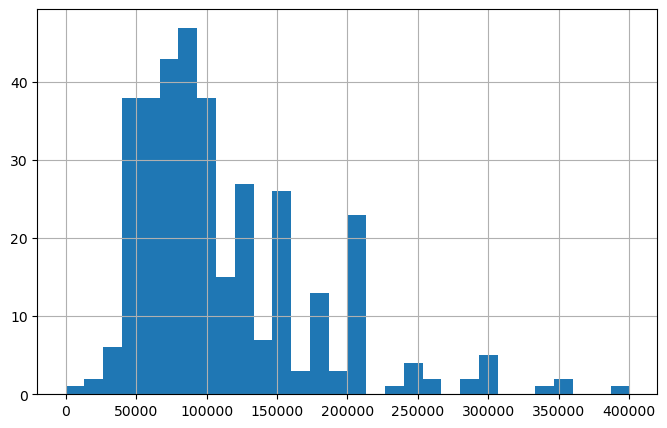

In [81]:
# построим гистограмму
df_da['salary_from'].hist(bins=30, range=(0,400000), figsize=(8,5))

По гистограмме видно, что преимущественно нижняя граница зарплат вписывается в диапазон от 25000 руб до 220000 руб. Слишком маленькие, близкие к нулю значения - явные выбросы, как и очень высокая з/п. Это имеет место быть, но в единичных случаях, что не отражает общую картину, однако может повлиять на подсчет средних значений.

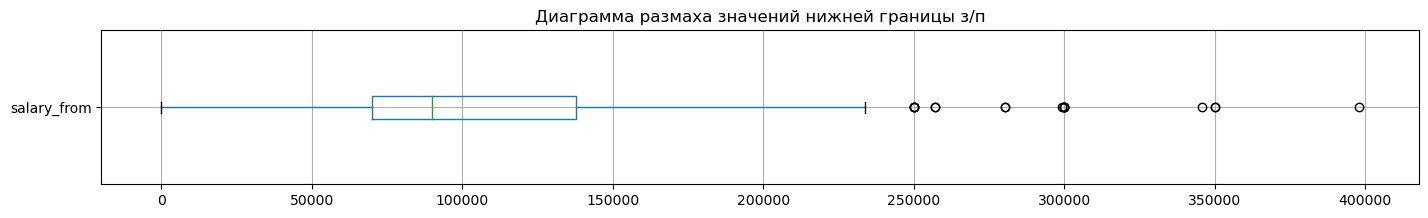

In [82]:
# строим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = df_da[['salary_from']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений нижней границы з/п');

По диаграмме размаха видно, что выбросы начинаются примерно с 240000 руб. Проверим, сколько это значений

In [83]:
len(df_da.query('salary_from > 240000'))

17

17 значений это менее 1% всех данных, удалим выбросы

In [84]:
df_da.drop(index=df_da.query('salary_from > 240000').index, inplace=True)

Посмотрим на минимальные значения зарплат

In [85]:
df_da['salary_from'].sort_values().head(3)

1110       50.0
98      25000.0
1102    26000.0
Name: salary_from, dtype: float64

Значение в 50 руб - явный выброс. Удалим строку

In [86]:
df_da.drop(index=df_da.query('salary_from == 50').index, inplace=True)

<u> Верхняя граница з/п для DA </u>

In [87]:
# изучим распределение значений
df_da['salary_to'].describe()

count       220.000000
mean     144333.863636
std       81502.792879
min       25000.000000
25%       85000.000000
50%      120000.000000
75%      200000.000000
max      420750.000000
Name: salary_to, dtype: float64

<Axes: >

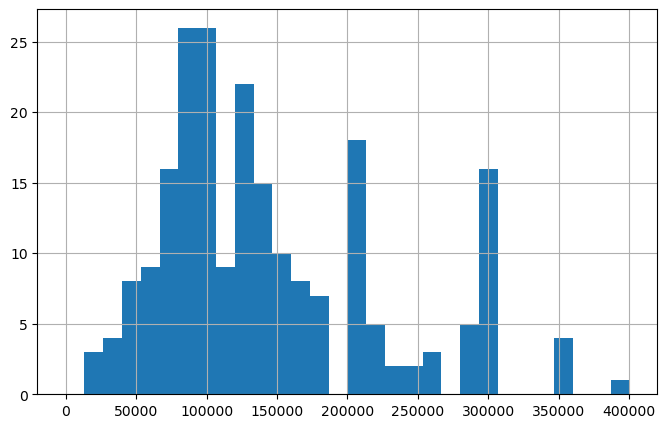

In [88]:
# построим гистограмму
df_da['salary_to'].hist(bins=30, range=(0,400000), figsize=(8,5))

По гистограмме видно, что преимущественно верхняя граница зарплат вписывается в диапазон от 25000 руб до 350000 руб. Зарплата приближенная к 400000 руб. имеет место быть, но в единичных случаях, что не отражает общую картину, однако может повлиять на подсчет средних значений.

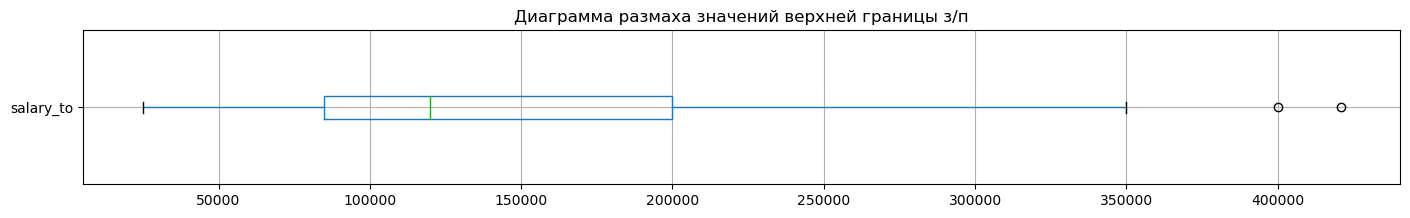

In [89]:
# строим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = df_da[['salary_to']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений верхней границы з/п');

По диаграмме размаха видно, что основные размеры зарплат укладываются в диапазон до 350000 руб. Значения выше - выбросы. Проверим, сколько это значений

In [90]:
len(df_da.query('salary_to > 350000'))

2

Удалим эти значения

In [91]:
df_da.drop(index=df_da.query('salary_to > 350000').index, inplace=True)

In [92]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1800
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1781 non-null   int64         
 1   name                              1781 non-null   object        
 2   published_at                      1781 non-null   datetime64[ns]
 3   alternate_url                     1781 non-null   object        
 4   type                              1781 non-null   object        
 5   employer                          1781 non-null   object        
 6   department                        1781 non-null   object        
 7   area                              1781 non-null   object        
 8   experience                        1781 non-null   object        
 9   key_skills                        1781 non-null   object        
 10  schedule                          1781 non-null   obj

Изначально данных было 1801 строка, сейчас - 1781 строка, что составляет 99 %, а значит потерян всего 1% данных, что допустимо.

<u>Нижняя граница з/п для DS</u>

In [93]:
# изучим распределение значений
df_ds['salary_from'].describe()

count        88.000000
mean     162650.772727
std       79280.231299
min       25000.000000
25%      100000.000000
50%      150000.000000
75%      200000.000000
max      350000.000000
Name: salary_from, dtype: float64

<Axes: >

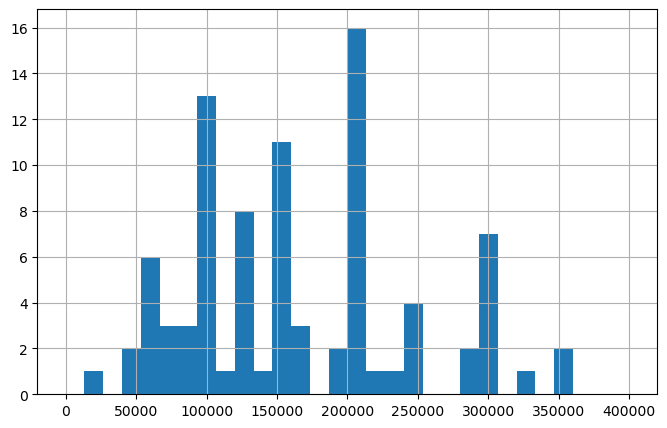

In [94]:
# построим гистограмму
df_ds['salary_from'].hist(bins=30, range=(0,400000), figsize=(8,5))

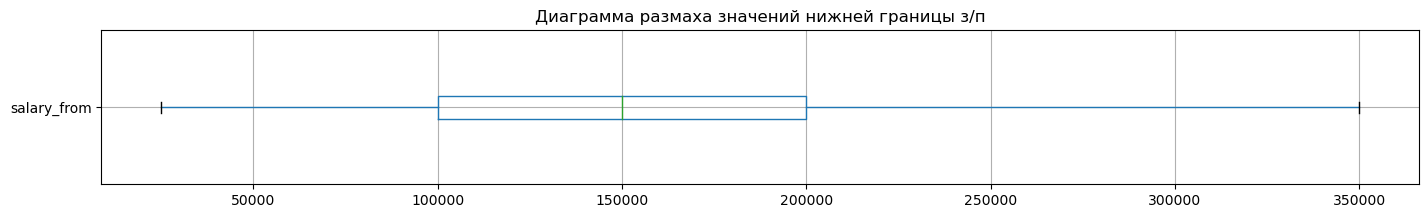

In [95]:
# строим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = df_ds[['salary_from']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений нижней границы з/п');

По гистограмме и диаграмме размаха видно, что явных выбросов в информации о нижней границе зарплат для DS нет. Её величина укладывается в диапазон от 25000 руб до 350000 руб.

<u> Верхняя граница з/п для DS </u>

In [96]:
# изучим распределение значений
df_ds['salary_to'].describe()

count        82.000000
mean     262430.097561
std      121160.488980
min       25000.000000
25%      192500.000000
50%      292500.000000
75%      350000.000000
max      550000.000000
Name: salary_to, dtype: float64

<Axes: >

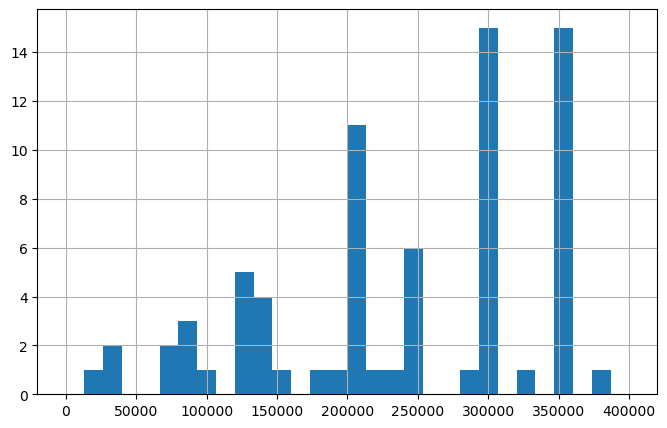

In [97]:
# построим гистограмму
df_ds['salary_to'].hist(bins=30, range=(0,400000), figsize=(8,5))

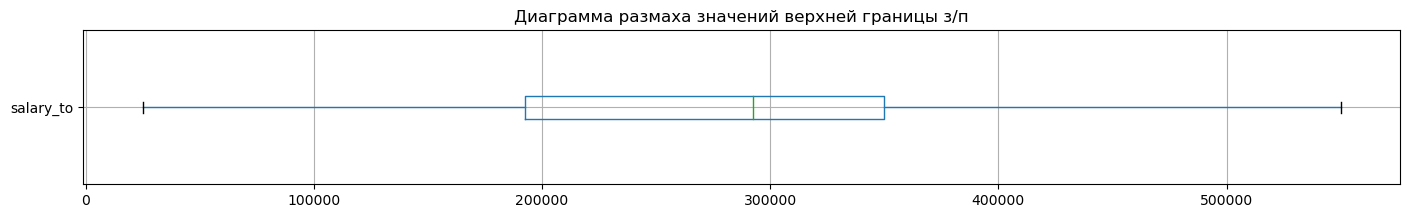

In [98]:
# строим диаграмму размаха
fig, ax = plt.subplots(figsize = (17,2))
ax = df_ds[['salary_to']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений верхней границы з/п');

По гистограмме и диаграмме размаха видно, что явных выбросов в информации о верхней границе зарплат для DS нет. Её величина укладывается в диапазон от 25000 руб до 550000 руб.

<u>Вывод:</u>
- для DA исследуемые данные укладываются в период с 13 февраля 2024 г по 11 июня 2024 г, для DS - с 29 февраля 2024 г по 11 июня 2024 г (на 16 дней меньше)
- зарплаты DA имеют нижнюю границу от 25000 руб. до 240000 руб и верхнюю границу от 25000 руб до 350000 руб. Зарплаты DS имеют нижнюю границу от 25000 руб до 350000 руб и верхнюю границу от 25000 руб до 550000 руб.
- добавлены столбцы со средней з/п, hardskills и softskills и их количеством

## 4. Выявление грейда требуемых специалистов <a id="section_4"></a>

Для выявления грейда требуемых специалистов используем данные из столбца experience (требуемый опыт работы)

In [99]:
# группируем данные по колонке с информацией о требуемом опыте, считаем количество вакансий для каждой категории (для DA)
da_grade = df_da.groupby('experience')['experience'].count().sort_values(ascending = False)
da_grade

experience
Junior+ (1-3 years)      1087
Middle (3-6 years)        540
Junior (no experince)     141
Senior (6+ years)          13
Name: experience, dtype: int64

In [100]:
# группируем данные по колонке с информацией о требуемом опыте, считаем количество вакансий для каждой категории (для DS)
ds_grade = df_ds.groupby('experience')['experience'].count().sort_values(ascending = False)
ds_grade

experience
Middle (3-6 years)       465
Junior+ (1-3 years)      433
Junior (no experince)     44
Senior (6+ years)         32
Name: experience, dtype: int64

In [101]:
# объединяем таблицы
grade = pd.concat([da_grade, ds_grade], axis=1)
grade

,experience,experience
experience,,
Junior+ (1-3 years),1087,433
Middle (3-6 years),540,465
Junior (no experince),141,44
Senior (6+ years),13,32


In [102]:
# переименовываем столбцы
grade.index.rename('грейд', inplace= True)
grade.columns.values[0] = 'DA'
grade.columns.values[1] = 'DS'

Text(0.5, 1.0, 'Количество вакансий\n')

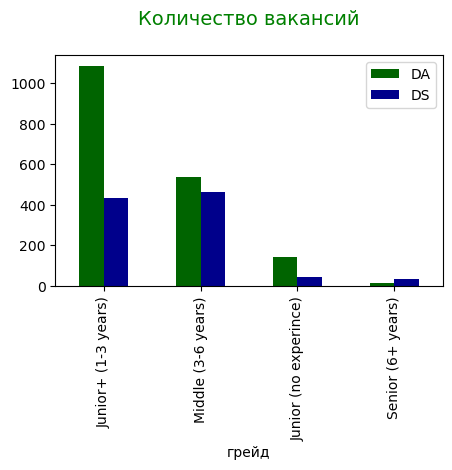

In [103]:
# строим столбчатую диаграмму
colors=['DarkGreen','DarkBlue']
(grade.plot(kind = 'bar', figsize = (5,3), rot = 90, legend = True, fontsize = 10, color=colors)
 .set_title('Количество вакансий' + "\n", fontsize = 14, color='Green')
)  

<u>Вывод:</u> и на вакансии DA, и на вакансии DS требуются специалисты четырех грейдов: Junior, Junior+, Middle и Senior. Среди аналитиков данных самая большая потребность в специалистах уровня Junior+. Среди Data Scientist наибольшим спросом пользуются специалисты уровня Middle и Junior +. Меньше всего вакансий для грейда Senior.

## 5. Определение доли грейдов среди вакансий DA и DS <a id="section_5"></a>

Необходимо определить какой процент от общего числа вакансий составляют вакансии каждого из грейдов

In [104]:
# добавим в таблицу грейдов столбцы с указанием процента, который составляет каждый грейд от общего числа вакансий
grade['per_of_total_DA'] = ((grade['DA']/len(df_da))*100).round(2)
grade['per_of_total_DS'] = ((grade['DS']/len(df_ds))*100).round(2)
grade

,DA,DS,per_of_total_DA,per_of_total_DS
грейд,,,,
Junior+ (1-3 years),1087,433,61.03,44.46
Middle (3-6 years),540,465,30.32,47.74
Junior (no experince),141,44,7.92,4.52
Senior (6+ years),13,32,0.73,3.29


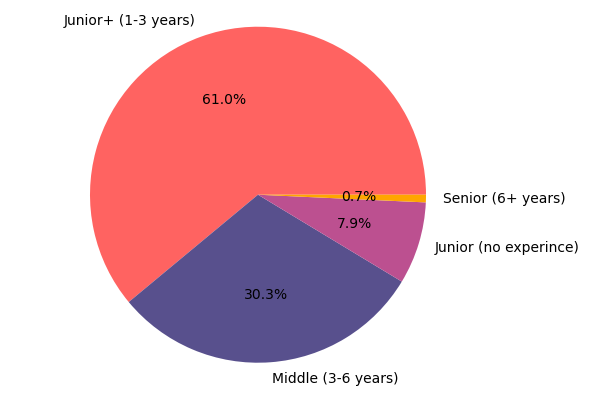

In [105]:
# построим круговую диаграмму доли грейдов среди вакансий DA
labels = grade.index
values = grade['per_of_total_DA']
colors = ['#ff6361','#58508d','#bc5090','#ffa600']
legend = grade.index
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

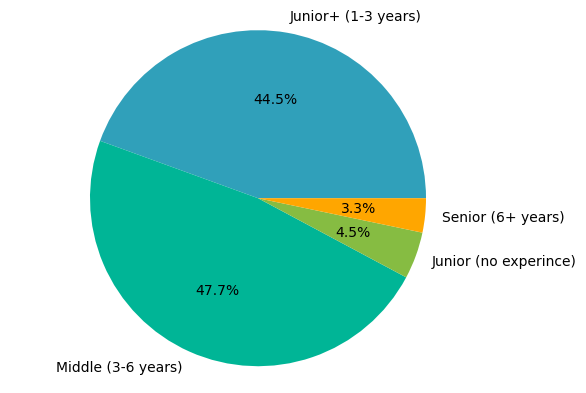

In [106]:
# построим круговую диаграмму доли грейдов среди вакансий DS
labels = grade.index
values = grade['per_of_total_DS']
colors = ['#30a0ba','#00b596','#86bc42','#ffa600']
legend = grade.index
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<u>Вывод:</u>
   - среди вакансий DA 61% составлет грейд Junior+, почти треть (30.3%) приходится на вакансии Middle. Грейд Junior составляет значительно меньшую часть (7.9 %). Доля вакансий Senior очень мала - меньше одного процента (0.7%)
   - среди вакансий DS наибольшей популярностью пользуются грейды Middle и Junior + (47.7% и 44.5% соответственно). Вакансий на позиции Junior и Senior значительно меньше, их доля составляет 4.5% и 3.3% соответственно

## 6. Определение типичного места работы <a id="section_6"></a>

### 6.1 Типичное место работы DA <a id="section_6_1"></a>

Для того, чтобы помимо общей информации проводить анализ по каждому грейду отдельно, разделим датафрейм на 4 части

In [107]:
df_da_jun = df_da.query('experience == "Junior (no experince)"')
df_da_jun_p = df_da.query('experience == "Junior+ (1-3 years)"')
df_da_mid = df_da.query('experience == "Middle (3-6 years)"')
df_da_sen = df_da.query('experience == "Senior (6+ years)"')

Определим топ работодателей по числу вакансий

In [108]:
df_da.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                                     241
WILDBERRIES                               43
Ozon                                      34
Банк ВТБ (ПАО)                            28
Т1                                        26
МАГНИТ, Розничная сеть                    24
МТС                                       22
Okko                                      19
Центральный банк Российской Федерации     16
Ростелеком                                15
Name: id, dtype: int64

Определим топ работодателей в разрезе грейдов

In [109]:
df_da_jun.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                            13
МАГНИТ, Розничная сеть           7
DNS Технологии                   4
Согласие, страховая компания     4
ANCOR                            3
Юникон АП                        3
Автомакон                        2
СИБУР, Группа компаний           2
Владхлеб                         2
АктивПромКапитал                 2
Name: id, dtype: int64

In [110]:
df_da_jun_p.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                                           157
Банк ВТБ (ПАО)                                  24
Ozon                                            17
WILDBERRIES                                     16
МАГНИТ, Розничная сеть                          15
МТС                                             15
Okko                                            12
Ростелеком                                      12
Центральный банк Российской Федерации           12
ГКУ Центр занятости населения города Москвы     11
Name: id, dtype: int64

In [111]:
df_da_mid.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                    71
WILDBERRIES             26
Т1                      21
Ozon                    15
Яндекс                  14
INGURU.RU                9
USETECH                  8
Maxim technology         8
Контур                   7
«UZUM TECHNOLOGIES».     7
Name: id, dtype: int64

In [112]:
df_da_sen.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
Леруа Мерлен          4
Reinvent Baltics      2
Aramco Innovations    1
B2Broker              1
CloudPayments         1
PayMatrix             1
Spice Agency          1
Мединвестгрупп        1
Секонд Сайт           1
Name: id, dtype: int64

Определим распределение числа вакансий по типу занятости

In [113]:
df_da.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       1744
Стажировка               16
Частичная занятость      16
Проектная работа          5
Name: id, dtype: int64

Определим распределение числа вакансий по типу занятости в разрезе грейдов

In [114]:
df_da_jun.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       122
Стажировка              15
Частичная занятость      3
Проектная работа         1
Name: id, dtype: int64

In [115]:
df_da_jun_p.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       1075
Частичная занятость       8
Проектная работа          3
Стажировка                1
Name: id, dtype: int64

In [116]:
df_da_mid.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       534
Частичная занятость      5
Проектная работа         1
Name: id, dtype: int64

In [117]:
df_da_sen.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость    13
Name: id, dtype: int64

Определим распределение числа вакансий по графику работы

In [118]:
df_da.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         1428
Удаленная работа     303
Гибкий график         41
Сменный график         9
Name: id, dtype: int64

Определим распределение числа вакансий по графику работы в разрезе грейдов

In [119]:
df_da_jun.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         122
Удаленная работа     14
Гибкий график         3
Сменный график        2
Name: id, dtype: int64

In [120]:
df_da_jun_p.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         901
Удаленная работа    158
Гибкий график        21
Сменный график        7
Name: id, dtype: int64

In [121]:
df_da_mid.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         397
Удаленная работа    126
Гибкий график        17
Name: id, dtype: int64

In [122]:
df_da_sen.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         8
Удаленная работа    5
Name: id, dtype: int64

Определим распределение числа вакансий по уровню з/п

In [123]:
df_da.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                1563
От 100 тысяч до 200 тысяч      95
Меньше 100 тысяч               68
От 200 тысяч до 300 тысяч      36
Больше 300 тысяч               19
Name: id, dtype: int64

Определим распределение числа вакансий по уровню з/п в разрезе грейдов

In [124]:
df_da_jun.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                108
Меньше 100 тысяч              29
От 100 тысяч до 200 тысяч      4
Name: id, dtype: int64

In [125]:
df_da_jun_p.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                956
От 100 тысяч до 200 тысяч     73
Меньше 100 тысяч              35
От 200 тысяч до 300 тысяч     21
Больше 300 тысяч               2
Name: id, dtype: int64

In [126]:
df_da_mid.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                488
От 100 тысяч до 200 тысяч     18
Больше 300 тысяч              17
От 200 тысяч до 300 тысяч     13
Меньше 100 тысяч               4
Name: id, dtype: int64

In [127]:
df_da_sen.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                11
От 200 тысяч до 300 тысяч     2
Name: id, dtype: int64

Колонка с указанием уровня зарплат не информативна, т.к. большинство полей имеет значение "ЗП не указана", кроме того, значения этой колонки не всегда совпадают с указанными величинами нижней и верхней границы зарплат. Будем ориентироваться именно на цифры нижней и верхней границ з/п

Посмотрим распределение нижней границы з/п в разрезе грейдов

In [128]:
# выведем статистическое описание столбца salary_from для Junior
df_da_jun['salary_from'].describe()

count        55.000000
mean      65877.181818
std       20691.827152
min       25000.000000
25%       55000.000000
50%       60000.000000
75%       79022.500000
max      140000.000000
Name: salary_from, dtype: float64

<Axes: >

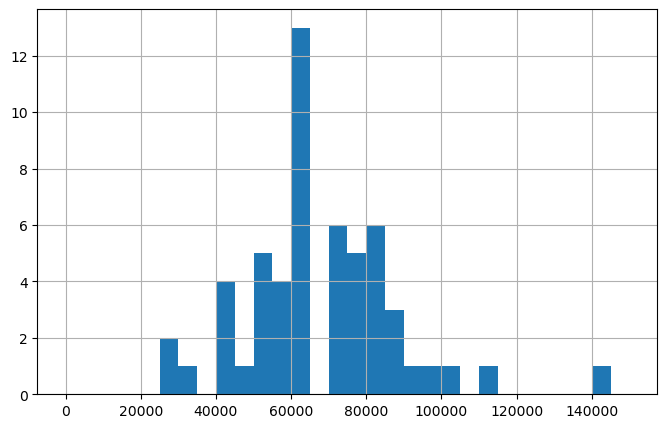

In [129]:
# построим гистограмму 
df_da_jun['salary_from'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [130]:
# выведем статистическое описание столбца salary_from для Junior +
df_da_jun_p['salary_from'].describe()

count       210.000000
mean      94809.476190
std       41110.989371
min       28940.000000
25%       70000.000000
50%       85780.000000
75%      113750.000000
max      233750.000000
Name: salary_from, dtype: float64

<Axes: >

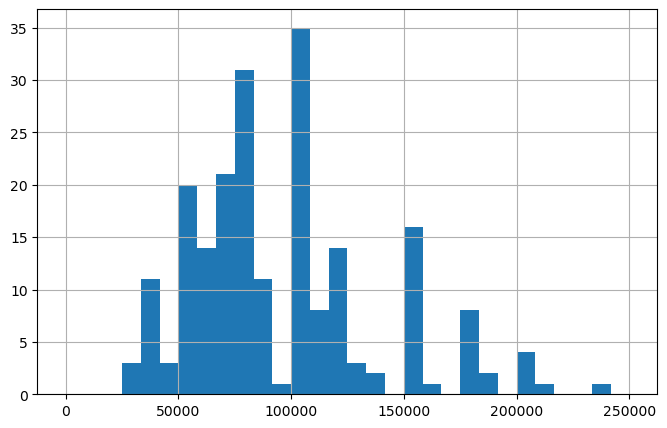

In [131]:
# построим гистограмму 
df_da_jun_p['salary_from'].hist(bins=30, range=(0,250000), figsize=(8,5))

In [132]:
# выведем статистическое описание столбца salary_from для Middle
df_da_mid['salary_from'].describe()

count        62.000000
mean     146662.016129
std       44142.412892
min       40000.000000
25%      120000.000000
50%      150000.000000
75%      197500.000000
max      200000.000000
Name: salary_from, dtype: float64

<Axes: >

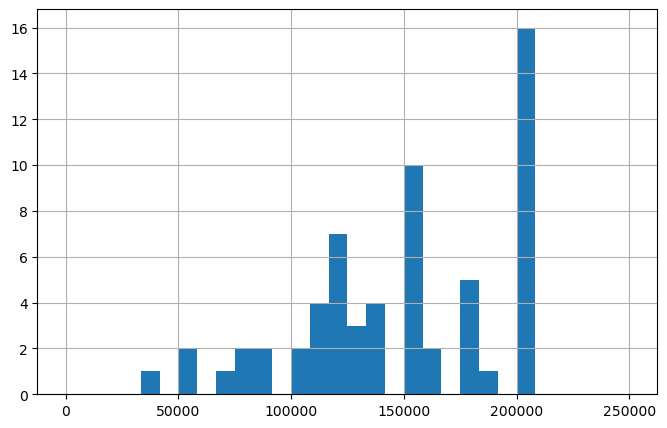

In [133]:
# построим гистограмму 
df_da_mid['salary_from'].hist(bins=30, range=(0,250000), figsize=(8,5))

In [134]:
# выведем статистическое описание столбца salary_from для Senior
df_da_sen['salary_from'].describe()

count         3.000000
mean     156666.666667
std       75055.534995
min       70000.000000
25%      135000.000000
50%      200000.000000
75%      200000.000000
max      200000.000000
Name: salary_from, dtype: float64

<Axes: >

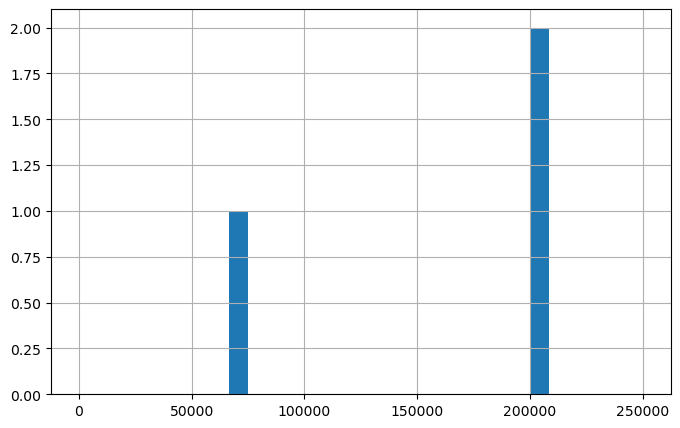

In [135]:
# построим гистограмму 
df_da_sen['salary_from'].hist(bins=30, range=(0,250000), figsize=(8,5))

Посмотрим распределение верхней границы з/п в разрезе грейдов

In [136]:
# выведем статистическое описание столбца salary_to для Junior
df_da_jun['salary_to'].describe()

count        33.000000
mean      72522.575758
std       29430.038973
min       25000.000000
25%       55000.000000
50%       80000.000000
75%       85000.000000
max      142000.000000
Name: salary_to, dtype: float64

<Axes: >

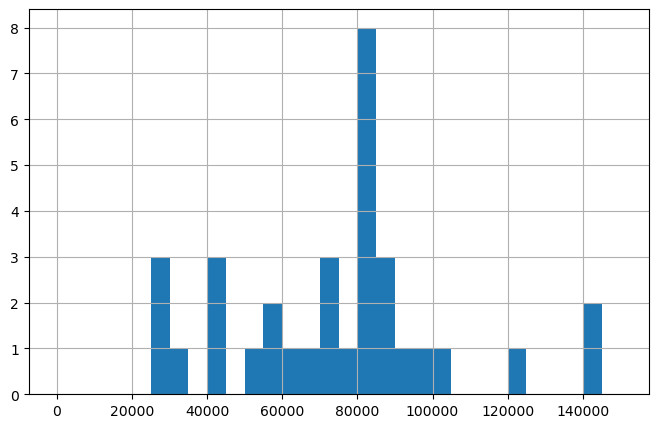

In [137]:
# построим гистограмму
df_da_jun['salary_to'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [138]:
# выведем статистическое описание столбца salary_to для Junior +
df_da_jun_p['salary_to'].describe()

count       131.000000
mean     129879.465649
std       59416.006754
min       35000.000000
25%       91000.000000
50%      120000.000000
75%      155000.000000
max      300000.000000
Name: salary_to, dtype: float64

<Axes: >

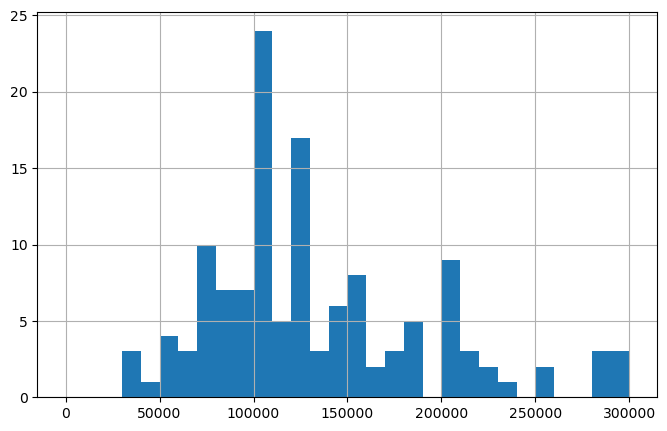

In [139]:
# построим гистограмму
df_da_jun_p['salary_to'].hist(bins=30, range=(0,300000), figsize=(8,5))

In [140]:
# выведем статистическое описание столбца salary_to для Middle
df_da_mid['salary_to'].describe()

count        52.000000
mean     212408.557692
std       84749.289108
min       55000.000000
25%      143750.000000
50%      200000.000000
75%      300000.000000
max      350000.000000
Name: salary_to, dtype: float64

<Axes: >

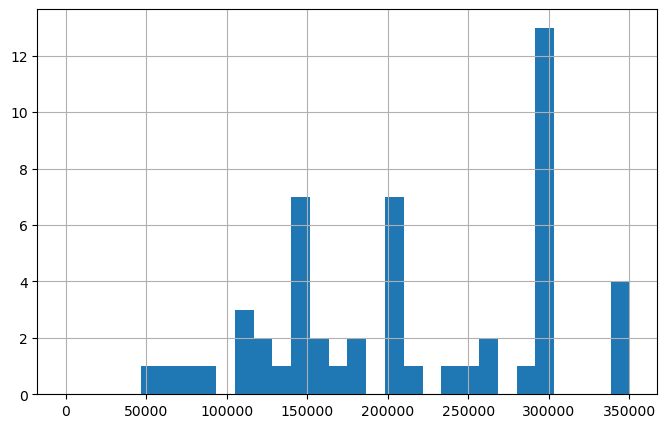

In [141]:
# построим гистограмму
df_da_mid['salary_to'].hist(bins=30, range=(0,350000), figsize=(8,5))

In [142]:
# выведем статистическое описание столбца salary_to для Senior
df_da_sen['salary_to'].describe()

count         2.000000
mean     240000.000000
std       56568.542495
min      200000.000000
25%      220000.000000
50%      240000.000000
75%      260000.000000
max      280000.000000
Name: salary_to, dtype: float64

<Axes: >

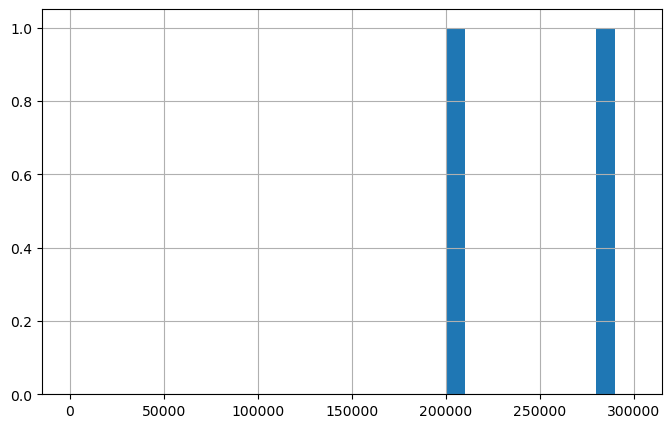

In [143]:
# построим гистограмму
df_da_sen['salary_to'].hist(bins=30, range=(0,300000), figsize=(8,5))

Проверим, почему уровень зарплат для грейда Senior получился меньше, чем для Middle

In [144]:
df_da_sen

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month,salary_mean,hard_skills,soft_skills,hard_count,soft_count
113,100602768,Аналитик данных Senior / (Интернет-эквайринг),2024-05-29 13:13:46,https://hh.ru/vacancy/100602768,Открытая,CloudPayments,отсутствует,Москва,Senior (6+ years),"['Проактивность', 'SQL', 'Python', 'BI', 'conf...",...,ЗП не указана,"sql, python, etl, tableau, аналитические иссле...",confluence,Проактивность,5,NaN,"python,tableau,etl,bi,sql,аналитические исслед...",,6.0,0.0
120,100630718,Data Analyst,2024-05-29 17:19:08,https://hh.ru/vacancy/100630718,Открытая,Reinvent Baltics,отсутствует,Москва,Senior (6+ years),"['SQL', 'Бизнес-анализ', 'Презентация результа...",...,ЗП не указана,"sql, python, английский язык, data analysis, t...",Юнит-экономика,"Коммуникация, Решение проблем, Презентация рез...",5,NaN,"data warehousing,прогнозирование,analysis,англ...",,16.0,0.0
133,100702507,Middle+/Senior Data Analyst в Data Accelerator,2024-06-11 11:57:20,https://hh.ru/vacancy/100702507,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"['SQL', 'A/B тесты', 'Python', 'Документация',...",...,ЗП не указана,"python, sql, a/b тесты","Pandas, confluence",Документация,6,NaN,"sql,a/b тесты,python",,3.0,0.0
134,100703282,Middle+/Senior Data Analyst в Data Accelerator,2024-06-11 12:03:17,https://hh.ru/vacancy/100703282,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"['SQL', 'A/B тесты', 'Python', 'Документация',...",...,ЗП не указана,"python, sql, a/b тесты","Pandas, confluence",Документация,6,NaN,"sql,a/b тесты,python",,3.0,0.0
388,91475828,Бизнес-аналитик / Аналитик данных,2024-04-01 10:51:07,https://hh.ru/vacancy/91475828,Открытая,Секонд Сайт,отсутствует,Москва,Senior (6+ years),['Проактивность'],...,От 200 тысяч до 300 тысяч,проактивность,NaN,Проактивность,4,240000.0,,проактивность,0.0,1.0
649,94768696,Data Scientist in Geoscience (Аналитик данных ...,2024-04-01 14:56:46,https://hh.ru/vacancy/94768696,Открытая,Aramco Innovations,отсутствует,Москва,Senior (6+ years),"['Английский язык', 'Machine Learning', 'Анали...",...,ЗП не указана,"python, machine learning, английский язык, dat...",Юнит-экономика,"Коммуникация, Документация, Презентация резуль...",4,NaN,"tensorflow,анализ данных,английский язык,pytho...",аналитическое мышление,11.0,1.0
1067,96632451,Аналитик данных,2024-04-10 15:41:07,https://hh.ru/vacancy/96632451,Открытая,PayMatrix,отсутствует,Москва,Senior (6+ years),"['Системный анализ', 'Визуализация данных', 'M...",...,От 200 тысяч до 300 тысяч,"основы баз данных, исследовательский анализ да...",NaN,NaN,4,135000.0,"интерпретация данных,визуализация данных,событ...",,8.0,0.0
1254,97432876,Middle+/Senior Data Analyst в Data Accelerator,2024-05-13 14:08:20,https://hh.ru/vacancy/97432876,Открытая,Леруа Мерлен,Леруа Мерлен. Центральный офис,Москва,Senior (6+ years),"['SQL', 'A/B тесты', 'Python', 'Документация',...",...,ЗП не указана,"python, sql, a/b тесты","Pandas, confluence",Документация,5,NaN,"sql,a/b тесты,python",,3.0,0.0
1255,97432884,Product Data analyst (управление товарными пот...,2024-05-13 14:08:26,https://hh.ru/vacancy/97432884,Открытая,Леруа Мерлен,ИТ,Москва,Senior (6+ years),"['Проактивность', 'Python', 'Аналитическое мыш...",...,ЗП не указана,"sql, python",NaN,"Проактивность, Аналитическое мышление",5,NaN,"sql,python",,2.0,0.0
1410,98138306,Data Analyst,2024-04-29 16:17:24,https://hh.ru/vacancy/98138306,Открытая,Reinvent Baltics,отсутствует,Москва,Senior (6+ years),"['SQL', 'Бизнес-анализ', 'Презентация результа...",...,ЗП не указана,"sql, python, английский язык, data analysis, t...",Юнит-экономика,"Коммуникация, Решение проблем, Презентация рез...",4,NaN,"data warehousing,прогнозирование,analysis,англ...",,15.0,0.0


Компании, разместившие вакансии грейда Senior практически не указывали уровнень з/п, а среди указанных нет ни одной вакансии свыше 300 тыс. При этом компания Play Matrix указывая з/п от 70 тыс.руб. до 200 тыс. руб в графе категории зарплаты указывает "От 200 тысяч до 300 тысяч".

Посмотрим распределение средней з/п в разрезе грейдов

In [145]:
# выведем статистическое описание столбца salary_mean для Junior
df_da_jun['salary_mean'].describe()

count        65.000000
mean      69870.692308
std       24928.490758
min       25000.000000
25%       60000.000000
50%       70000.000000
75%       80000.000000
max      142000.000000
Name: salary_mean, dtype: float64

<Axes: >

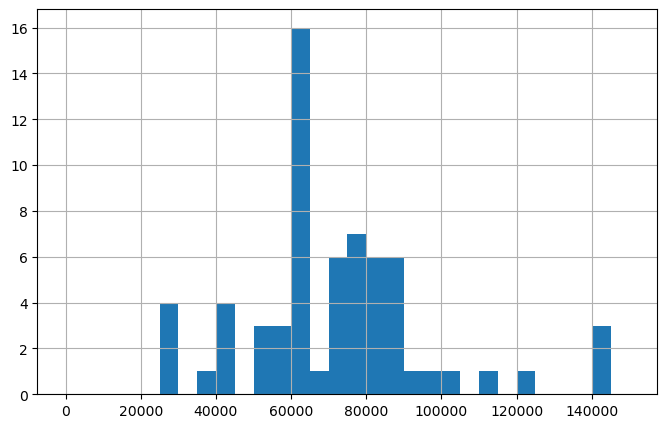

In [146]:
# построим гистограмму
df_da_jun['salary_mean'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [147]:
# выведем статистическое описание столбца salary_mean для Junior +
df_da_jun_p['salary_mean'].describe()

count       251.000000
mean     107594.920319
std       48135.134984
min       30000.000000
25%       75000.000000
50%      100000.000000
75%      127500.000000
max      298000.000000
Name: salary_mean, dtype: float64

<Axes: >

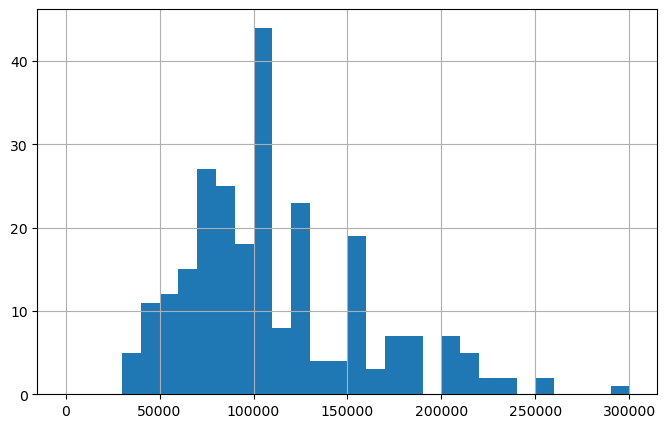

In [148]:
# построим гистограмму
df_da_jun_p['salary_mean'].hist(bins=30, range=(0,300000), figsize=(8,5))

In [149]:
# выведем статистическое описание столбца salary_mean для Middle
df_da_mid['salary_mean'].describe()

count        83.000000
mean     172984.879518
std       65931.881241
min       50000.000000
25%      126200.000000
50%      165000.000000
75%      221700.000000
max      350000.000000
Name: salary_mean, dtype: float64

<Axes: >

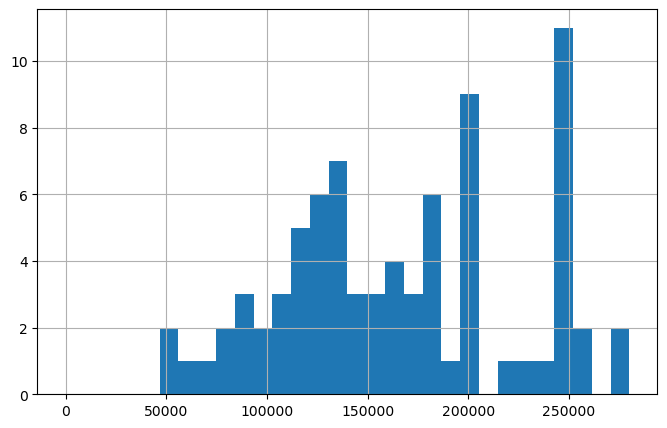

In [150]:
# построим гистограмму
df_da_mid['salary_mean'].hist(bins=30, range=(0,280000), figsize=(8,5))

In [151]:
# выведем статистическое описание столбца salary_mean для Senior
df_da_sen['salary_mean'].describe()

count         3.000000
mean     191666.666667
std       52993.710319
min      135000.000000
25%      167500.000000
50%      200000.000000
75%      220000.000000
max      240000.000000
Name: salary_mean, dtype: float64

<Axes: >

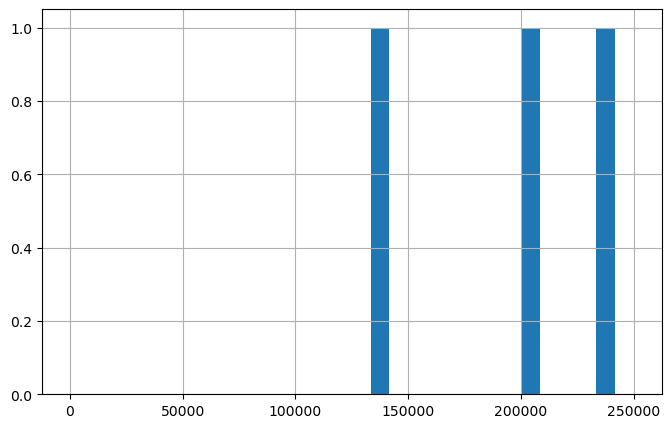

In [152]:
# построим гистограмму
df_da_sen['salary_mean'].hist(bins=30, range=(0,250000), figsize=(8,5))

Вывод: 
   - типичное место работы для грейда Junior: СБЕР, полная занятость, полный день, з/п от 60 тыс.руб. до 80 тыс. руб. Среднее значение з/п около 68 тыс. руб
   - типичное место работы для грейда Junior +: СБЕР, полная занятость, полный день, з/п от 86 тыс. руб. до 120 тыс. руб (медианные значения), при этом большинство вакансий на зарплату около 100 тыс.руб.
   - типичное место работы для грейда Middle: СБЕР, полная занятость, полный день, з/п от 150 тыс. руб. до 200 тыс. руб(ориентируясь на медианные значения), средняя зарплата около 165 тыс. руб. При этом имеется значительное количество вакансий со средней зарплатой около 250 тыс. руб. 
   - типичное место работы для грейда Senior: Леруа Мерлен, полная занятость, полный день, з/п от 200 тыс. руб. до 280 тыс. руб. Средняя з/п около 200 тыс. руб 
   - в датасете мало вакансий Senior и максимальная предлагаемая зарпалата для данного грейда 280 тыс. руб., что меньше чем для Middle в других компаниях. Это происходит потому что компании, разместившие вакансии грейда Senior практически не указывали уровнень з/п, а среди указанных нет ни одной вакансии свыше 300 тыс. Можно сделать вывод, что компании неохотно указывают уровень зарплат на самый высокий грейд. Но поскольку, средний уровень для Middle - 200 тыс.руб, следует учитывать, что для Senior он должен быть выше 200 тыс.руб
   - СБЕР предоставляет преимущественное количество вакансий для DA в целом, в тройку входят маркетплейсы WILDBERRIES и Ozon
   - Большинство работодателей предпочитает сотрудников с полной занятостью и полным рабочим днем

### 6.2 Типичное место работы DS <a id="section_6_2"></a>

Для того, чтобы помимо общей информации проводить анализ по каждому грейду отдельно, разделим датафрейм на 4 части

In [153]:
df_ds_jun = df_ds.query('experience == "Junior (no experince)"')
df_ds_jun_p = df_ds.query('experience == "Junior+ (1-3 years)"')
df_ds_mid = df_ds.query('experience == "Middle (3-6 years)"')
df_ds_sen = df_ds.query('experience == "Senior (6+ years)"')

Определим топ работодателей по числу вакансий

In [154]:
df_ds.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР              198
Ozon               36
Газпромбанк        24
Samokat.tech       20
Т1                 19
Банк ВТБ (ПАО)     18
WILDBERRIES        16
Lamoda Tech        12
Ростелеком         12
Газпром нефть      11
Name: id, dtype: int64

Определим топ работодателей в разрезе грейдов

In [155]:
df_ds_jun.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                                                  12
Молвер                                                 5
Ozon                                                   4
Правительство Москвы                                   3
Lamoda Tech                                            2
BND LLC                                                1
МигКредит                                              1
Шлюмберже                                              1
ФГБУН Институт психологии Российской академии наук     1
Университет Иннополис                                  1
Name: id, dtype: int64

In [156]:
df_ds_jun_p.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР                             96
Банк ВТБ (ПАО)                   13
Ростелеком                       12
Сахалин - Остров Возможностей     9
билайн                            8
Газпромбанк                       8
Ozon                              7
Т1                                7
МегаФон                           7
1221Системс                       7
Name: id, dtype: int64

In [157]:
df_ds_mid.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
СБЕР               88
Ozon               25
Газпромбанк        16
WILDBERRIES        14
Samokat.tech       13
Т1                 12
Газпром нефть       8
ДОМ.РФ              8
Spice Agency        6
Райффайзен Банк     6
Name: id, dtype: int64

In [158]:
df_ds_sen.groupby('employer')['id'].count().sort_values(ascending=False).head(10)

employer
Fundraise Up                      3
СБЕР                              2
Aramco Innovations                2
РУСАЛ, Центр подбора персонала    2
Sape                              2
Гудфокаст                         2
БиАйЭй-Технолоджиз                2
7RedLines                         1
ГПМ Партнер                       1
РСХБ-Интех                        1
Name: id, dtype: int64

Определим распределение числа вакансий по типу занятости

In [159]:
df_ds.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       942
Стажировка              19
Частичная занятость      8
Проектная работа         5
Name: id, dtype: int64

Определим распределение числа вакансий по типу занятости в разрезе грейдов

In [160]:
df_ds_jun.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость    26
Стажировка          17
Проектная работа     1
Name: id, dtype: int64

In [161]:
df_ds_jun_p.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       422
Частичная занятость      7
Проектная работа         2
Стажировка               2
Name: id, dtype: int64

In [162]:
df_ds_mid.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость       462
Проектная работа         2
Частичная занятость      1
Name: id, dtype: int64

In [163]:
df_ds_sen.groupby('employment')['id'].count().sort_values(ascending=False).head(10)

employment
Полная занятость    32
Name: id, dtype: int64

Определим распределение числа вакансий по графику работы

In [164]:
df_ds.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         723
Удаленная работа    203
Гибкий график        43
Сменный график        5
Name: id, dtype: int64

Определим распределение числа вакансий по графику работы в разрезе грейдов

In [165]:
df_ds_jun.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         28
Удаленная работа     9
Гибкий график        7
Name: id, dtype: int64

In [166]:
df_ds_jun_p.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         316
Удаленная работа     99
Гибкий график        15
Сменный график        3
Name: id, dtype: int64

In [167]:
df_ds_mid.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         355
Удаленная работа     90
Гибкий график        19
Сменный график        1
Name: id, dtype: int64

In [168]:
df_ds_sen.groupby('schedule')['id'].count().sort_values(ascending=False).head(10)

schedule
Полный день         24
Удаленная работа     5
Гибкий график        2
Сменный график       1
Name: id, dtype: int64

Определим распределение числа вакансий по уровню з/п

In [169]:
df_ds.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                892
Больше 300 тысяч              41
От 200 тысяч до 300 тысяч     20
От 100 тысяч до 200 тысяч     13
Меньше 100 тысяч               8
Name: id, dtype: int64

Определим распределение числа вакансий по уровню з/п в разрезе грейдов

In [170]:
df_ds_jun.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                40
Меньше 100 тысяч              3
От 100 тысяч до 200 тысяч     1
Name: id, dtype: int64

In [171]:
df_ds_jun_p.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                394
Больше 300 тысяч              17
От 200 тысяч до 300 тысяч     10
От 100 тысяч до 200 тысяч      7
Меньше 100 тысяч               5
Name: id, dtype: int64

In [172]:
df_ds_mid.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                429
Больше 300 тысяч              22
От 200 тысяч до 300 тысяч     10
От 100 тысяч до 200 тысяч      4
Name: id, dtype: int64

In [173]:
df_ds_sen.groupby('salary_bin')['id'].count().sort_values(ascending=False).head(10)

salary_bin
ЗП не указана                29
Больше 300 тысяч              2
От 100 тысяч до 200 тысяч     1
Name: id, dtype: int64

Колонка с указанием уровня зарплат не информативна, т.к. большинство полей имеет значение "ЗП не указана", кроме того, значения этой колонки не всегда совпадают с указанными величинами нижней и верхней границы зарплат. Будем ориентироваться именно на цифры нижней и верхней границ з/п

Посмотрим распределение нижней границы з/п в разрезе грейдов

In [174]:
# выведем статистическое описание столбца salary_from для Junior
df_ds_jun['salary_from'].describe()

count         9.000000
mean      73333.555556
std       35982.340582
min       25000.000000
25%       60000.000000
50%       60000.000000
75%       70000.000000
max      140250.000000
Name: salary_from, dtype: float64

<Axes: >

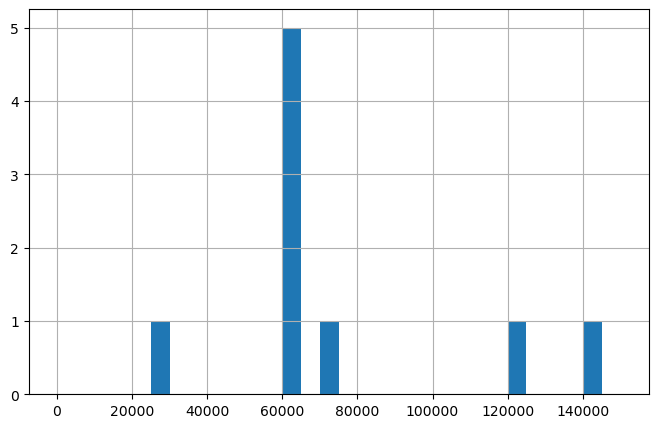

In [175]:
# построим гистограмму
df_ds_jun['salary_from'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [176]:
# выведем статистическое описание столбца salary_from для Junior +
df_ds_jun_p['salary_from'].describe()

count        36.000000
mean     124250.000000
std       45942.432923
min       50000.000000
25%      100000.000000
50%      120000.000000
75%      150000.000000
max      210000.000000
Name: salary_from, dtype: float64

<Axes: >

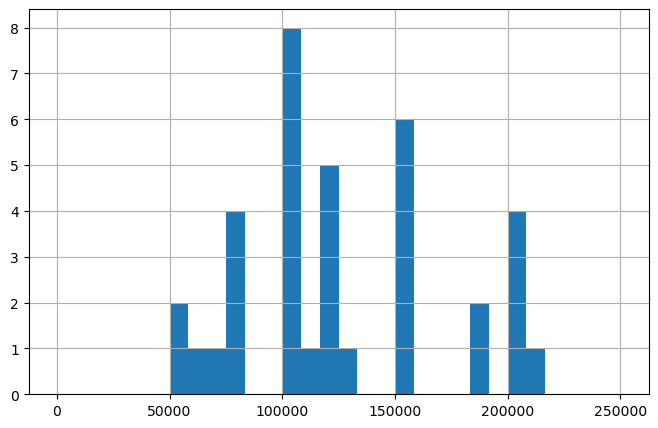

In [177]:
# построим гистограмму
df_ds_jun_p['salary_from'].hist(bins=30, range=(0,250000), figsize=(8,5))

In [178]:
# выведем статистическое описание столбца salary_from для Middle
df_ds_mid['salary_from'].describe()

count        42.000000
mean     214768.238095
std       73852.230837
min       93500.000000
25%      152500.000000
50%      200000.000000
75%      280000.000000
max      350000.000000
Name: salary_from, dtype: float64

<Axes: >

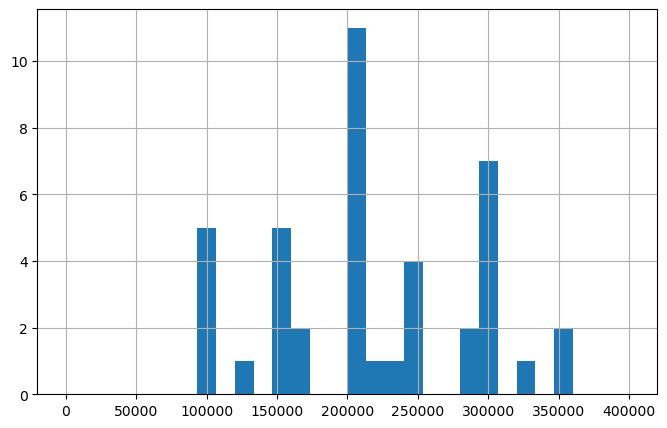

In [179]:
# построим гистограмму
df_ds_mid['salary_from'].hist(bins=30, range=(0,400000), figsize=(8,5))

In [180]:
# выведем статистическое описание столбца salary_from для Senior
df_ds_sen['salary_from'].describe()

count         1.0
mean     160000.0
std           NaN
min      160000.0
25%      160000.0
50%      160000.0
75%      160000.0
max      160000.0
Name: salary_from, dtype: float64

<Axes: >

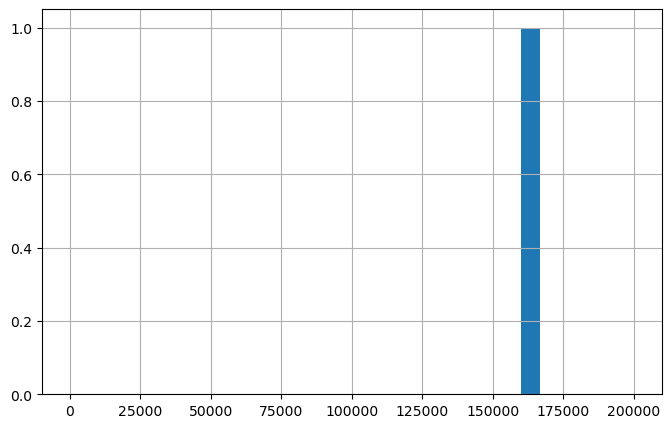

In [181]:
# построим гистограмму
df_ds_sen['salary_from'].hist(bins=30, range=(0,200000), figsize=(8,5))

Посмотрим распределение верхней границы з/п в разрезе грейдов

In [182]:
# выведем статистическое описание столбца salary_to для Junior
df_ds_jun['salary_to'].describe()

count         4.000000
mean      77438.000000
std       40830.895688
min       25000.000000
25%       66250.000000
50%       80000.000000
75%       91188.000000
max      124752.000000
Name: salary_to, dtype: float64

<Axes: >

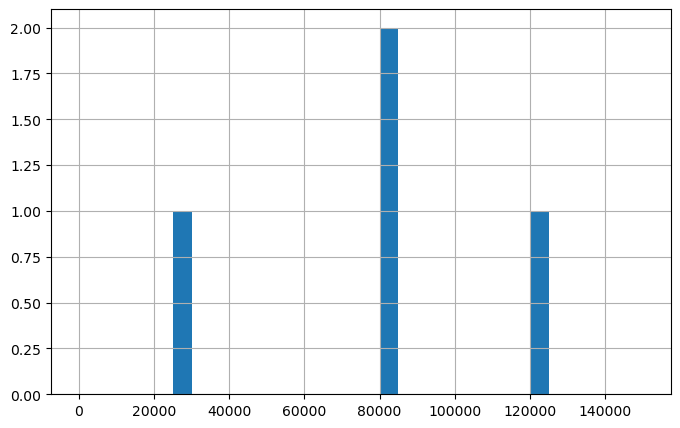

In [183]:
# построим гистограмму
df_ds_jun['salary_to'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [184]:
# выведем статистическое описание столбца salary_to для Junior +
df_ds_jun_p['salary_to'].describe()

count        39.000000
mean     231282.051282
std      102191.241956
min       30000.000000
25%      140000.000000
50%      250000.000000
75%      300000.000000
max      350000.000000
Name: salary_to, dtype: float64

<Axes: >

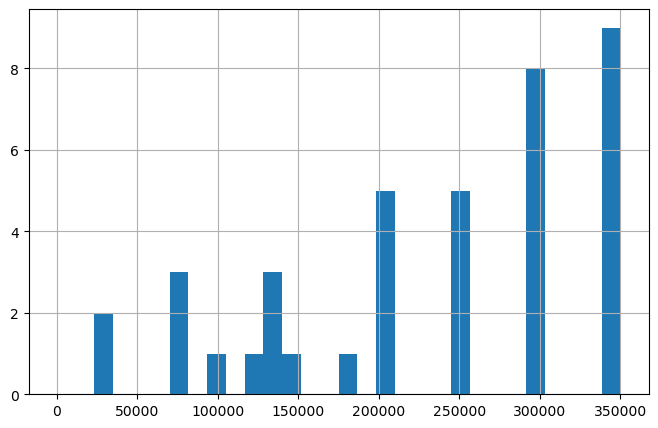

In [185]:
# построим гистограмму
df_ds_jun_p['salary_to'].hist(bins=30, range=(0,350000), figsize=(8,5))

In [186]:
# выведем статистическое описание столбца salary_to для Middle
df_ds_mid['salary_to'].describe()

count        36.000000
mean     309708.777778
std      112463.525171
min      140250.000000
25%      205524.500000
50%      300000.000000
75%      357500.000000
max      500000.000000
Name: salary_to, dtype: float64

<Axes: >

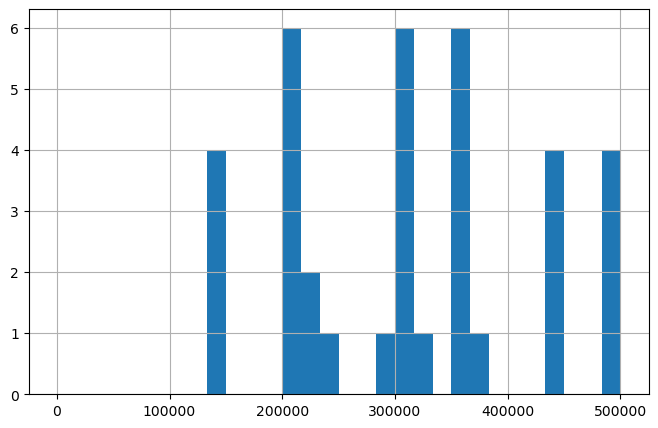

In [187]:
# построим гистограмму
df_ds_mid['salary_to'].hist(bins=30, range=(0,500000), figsize=(8,5))

In [188]:
# выведем статистическое описание столбца salary_to для Senior
df_ds_sen['salary_to'].describe()

count         3.000000
mean     346666.666667
std      184481.254694
min      190000.000000
25%      245000.000000
50%      300000.000000
75%      425000.000000
max      550000.000000
Name: salary_to, dtype: float64

<Axes: >

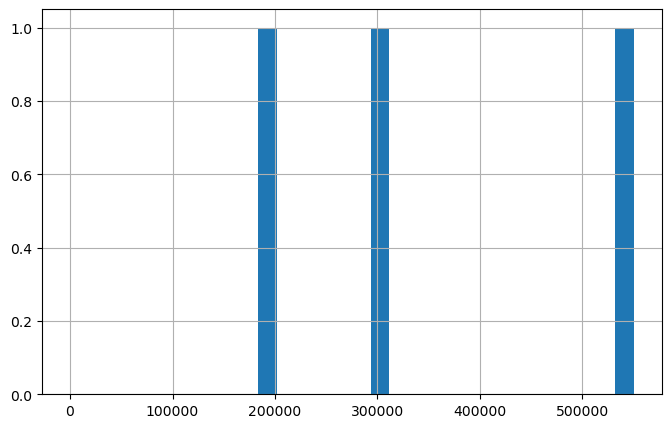

In [189]:
# построим гистограмму
df_ds_sen['salary_to'].hist(bins=30, range=(0,550000), figsize=(8,5))

Посмотрим распределение величин средних з/п в разрезе грейдов

In [190]:
# выведем статистическое описание столбца salary_mean для Junior
df_ds_jun['salary_mean'].describe()

count        11.000000
mean      70000.181818
std       35507.525968
min       25000.000000
25%       60000.000000
50%       60000.000000
75%       77500.000000
max      140250.000000
Name: salary_mean, dtype: float64

<Axes: >

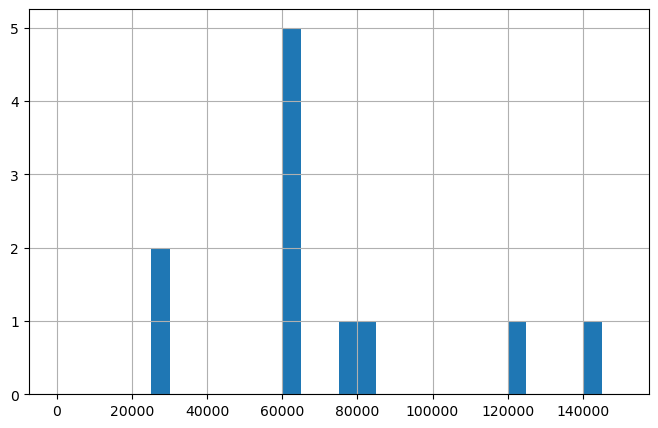

In [191]:
# построим гистограмму
df_ds_jun['salary_mean'].hist(bins=30, range=(0,150000), figsize=(8,5))

In [192]:
# выведем статистическое описание столбца salary_mean для Junior +
df_ds_jun_p['salary_mean'].describe()

count        56.000000
mean     183267.857143
std       94360.718150
min       30000.000000
25%      100000.000000
50%      195000.000000
75%      225000.000000
max      350000.000000
Name: salary_mean, dtype: float64

<Axes: >

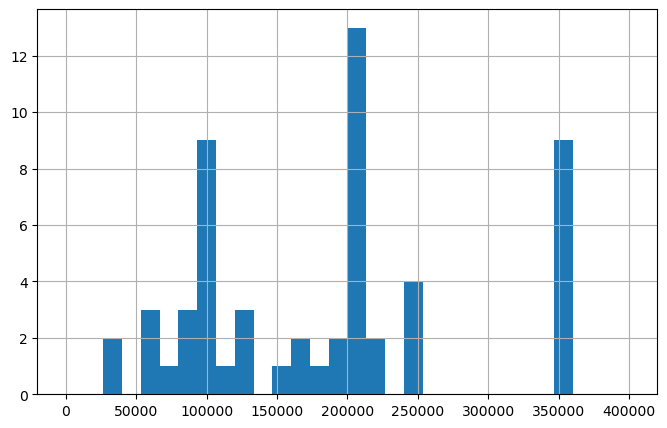

In [193]:
# построим гистограмму
df_ds_jun_p['salary_mean'].hist(bins=30, range=(0,400000), figsize=(8,5))

In [194]:
# выведем статистическое описание столбца salary_from для Middle
df_ds_mid['salary_mean'].describe()

count        51.000000
mean     258168.450980
std       93605.067482
min      100000.000000
25%      195000.000000
50%      250000.000000
75%      325000.000000
max      500000.000000
Name: salary_mean, dtype: float64

<Axes: >

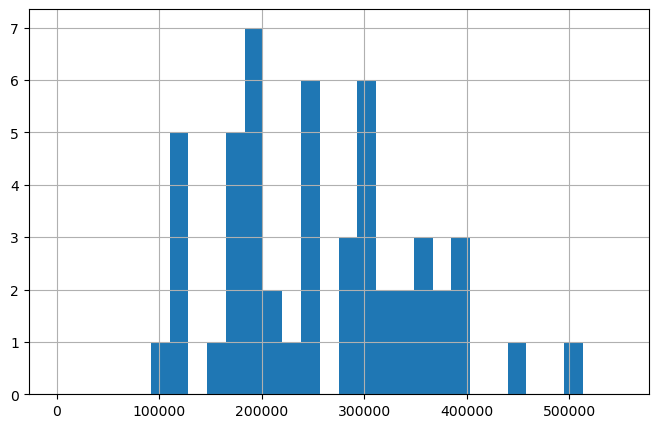

In [195]:
# построим гистограмму
df_ds_mid['salary_mean'].hist(bins=30, range=(0,550000), figsize=(8,5))

In [196]:
# выведем статистическое описание столбца salary_from для Senior
df_ds_sen['salary_mean'].describe()

count         3.000000
mean     341666.666667
std      190940.653956
min      175000.000000
25%      237500.000000
50%      300000.000000
75%      425000.000000
max      550000.000000
Name: salary_mean, dtype: float64

<Axes: >

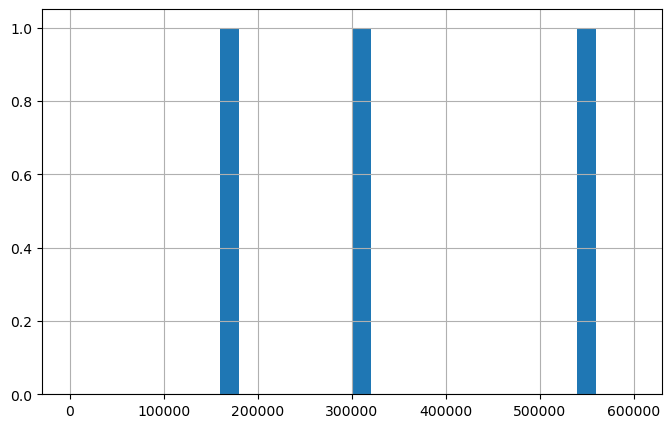

In [197]:
# построим гистограмму
df_ds_sen['salary_mean'].hist(bins=30, range=(0,600000), figsize=(8,5))

Вывод: 
   - типичное место работы для грейда Junior: СБЕР, полная занятость, полный день, з/п от 60 тыс.руб. до 80 тыс. руб. Величина средних зарплат в большинстве случаев около 60 тыс. руб
   - типичное место работы для грейда Junior +: СБЕР, полная занятость, полный день, з/п от 120 тыс. руб. до 250 тыс. руб (медианные значения), при этом значительное количество вакансий на зарплату около 350 тыс.руб. Величина средней зарплаты около 200 тыс. руб.
   - типичное место работы для грейда Middle: СБЕР, полная занятость, полный день, з/п от 200 тыс. руб. до 300 тыс. руб. Средняя зарплата чаще всего укладывается в диапазон от 200 до 250 тыс. руб
   - типичное место работы для грейда Senior: Fundraise Up, полная занятость, полный день, з/п от 160 тыс. руб. до 300 тыс. руб.(медианные значения), при этом есть вакансия на 550 тыс.руб
   - в датасете мало вакансий на позицию Senior, при этом большинство работодателей не указывает зарплату для этого грейда. Поэтому значения, которые можно получить в результате анализа не самые информативные. Ориентируясь на то, что з/п для уровня Middle имеет верхнюю границу 300 тыс. руб (по медианным значениям), уровень зарплат для Senior DS должен быть более 300 тыс. руб.
   - СБЕР предоставляет преимущественное количество вакансий для DS в целом, в тройку входят Ozon и Газпромбанк
   - Большинство работодателей предпочитает сотрудников с полной занятостью и полным рабочим днем

## 7. Исследование требуемых навыков <a id="section_7"></a>

Необходимо определить, какие навыки требуются чаще, hard или soft

In [198]:
# посчитаем общее количество hard навыков для DA
df_da['hard_count'].sum()

6415.0

In [199]:
# посчитаем, сколько в среднем приходится требуемых hard навыков на 1 вакансию DA
(df_da['hard_count'].sum())/len(df_da)

3.6019090398652445

In [200]:
# посчитаем общее количество soft навыков для DA
df_da['soft_count'].sum()

781.0

In [201]:
# посчитаем, сколько в среднем приходится требуемых soft навыков на 1 вакансию DA
(df_da['soft_count'].sum())/len(df_da)

0.43851768669286917

In [202]:
# посчитаем общее количество hard навыков для DS
df_ds['hard_count'].sum()

3592.0

In [203]:
# посчитаем, сколько в среднем приходится требуемых hard навыков на 1 вакансию DS
(df_ds['hard_count'].sum())/len(df_ds)

3.6878850102669403

In [204]:
# посчитаем общее количество soft навыков для DS
df_ds['soft_count'].sum()

430.0

In [205]:
# посчитаем, сколько в среднем приходится требуемых soft навыков на 1 вакансию DS
(df_ds['soft_count'].sum())/len(df_ds)

0.4414784394250513

In [206]:
# сформируем сводную таблицу с суммой hard и soft навыков по грейдам
df_da_skill_pivot = df_da.pivot_table(index=['experience'],values=['hard_count','soft_count'],aggfunc='sum')
# переименуем колонку с указанием грейда, hard и soft навыков
df_da_skill_pivot.index.rename('грейд', inplace= True)
df_da_skill_pivot.columns.values[0] = 'hard'
df_da_skill_pivot.columns.values[1] = 'soft'
df_da_skill_pivot

,hard,soft
грейд,,
Junior (no experince),388.0,92.0
Junior+ (1-3 years),3868.0,490.0
Middle (3-6 years),2083.0,197.0
Senior (6+ years),76.0,2.0


In [207]:
# сформируем сводную таблицу с количеством вакансий по грейдам
df_da_grade_count = df_da.pivot_table(index=['experience'],values=['id'],aggfunc='count')
df_da_grade_count

,id
experience,
Junior (no experince),141
Junior+ (1-3 years),1087
Middle (3-6 years),540
Senior (6+ years),13


In [208]:
# посчитаем сколько в среднем приходится требуемых навыков на 1 человека по грейдам
# результаты запишем в отдельные столбцы
df_da_skill_pivot['hard_per_person'] = (df_da_skill_pivot['hard']/df_da_grade_count['id']).round(2)
df_da_skill_pivot['soft_per_person'] = (df_da_skill_pivot['soft']/df_da_grade_count['id']).round(2)
df_da_skill_pivot

,hard,soft,hard_per_person,soft_per_person
грейд,,,,
Junior (no experince),388.0,92.0,2.75,0.65
Junior+ (1-3 years),3868.0,490.0,3.56,0.45
Middle (3-6 years),2083.0,197.0,3.86,0.36
Senior (6+ years),76.0,2.0,5.85,0.15


In [209]:
# удалим столбцы с количеством навыков, чтобы в дальнейшем удобнее было строить график
df_da_skill_pivot.drop(['hard', 'soft'], axis=1, inplace=True)

Text(0.5, 1.0, 'Среднее количество требуемых навыков на человека\n')

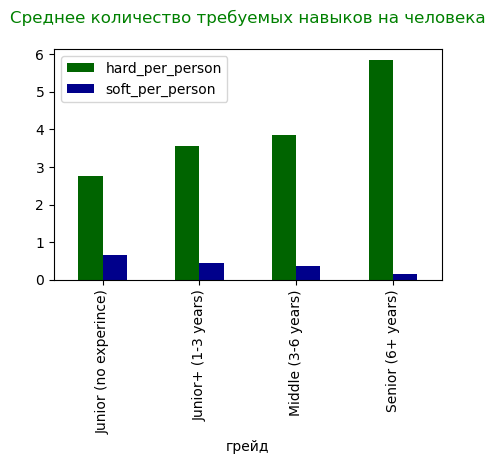

In [210]:
# построим столбчатую диаграмму
colors=['DarkGreen','DarkBlue']
(df_da_skill_pivot.plot(kind = 'bar', figsize = (5,3), rot = 90, legend = True, fontsize = 10, color=colors)
 .set_title('Среднее количество требуемых навыков на человека' + "\n", fontsize = 12, color='Green')
)  

Аналогично проведем расчеты и анализ для DS

In [211]:
# сформируем сводную таблицу с суммой hard и soft навыков по грейдам
df_ds_skill_pivot = df_ds.pivot_table(index=['experience'],values=['hard_count','soft_count'],aggfunc='sum')
# переименуем колонку с указанием грейда, hard и soft навыков
df_ds_skill_pivot.index.rename('грейд', inplace= True)
df_ds_skill_pivot.columns.values[0] = 'hard'
df_ds_skill_pivot.columns.values[1] = 'soft'
df_ds_skill_pivot

,hard,soft
грейд,,
Junior (no experince),153.0,13.0
Junior+ (1-3 years),1662.0,228.0
Middle (3-6 years),1631.0,170.0
Senior (6+ years),146.0,19.0


In [212]:
# сформируем сводную таблицу с количеством вакансий по грейдам
df_ds_grade_count = df_ds.pivot_table(index=['experience'],values=['id'],aggfunc='count')
df_ds_grade_count

,id
experience,
Junior (no experince),44
Junior+ (1-3 years),433
Middle (3-6 years),465
Senior (6+ years),32


In [213]:
# посчитаем сколько в среднем приходится требуемых навыков на 1 человека по грейдам
# результаты запишем в отдельные столбцы
df_ds_skill_pivot['hard_per_person'] = (df_ds_skill_pivot['hard']/df_ds_grade_count['id']).round(2)
df_ds_skill_pivot['soft_per_person'] = (df_ds_skill_pivot['soft']/df_ds_grade_count['id']).round(2)
df_ds_skill_pivot

,hard,soft,hard_per_person,soft_per_person
грейд,,,,
Junior (no experince),153.0,13.0,3.48,0.30
Junior+ (1-3 years),1662.0,228.0,3.84,0.53
Middle (3-6 years),1631.0,170.0,3.51,0.37
Senior (6+ years),146.0,19.0,4.56,0.59


In [214]:
# удалим столбцы с количеством навыков, чтобы в дальнейшем удобнее было строить график
df_ds_skill_pivot.drop(['hard', 'soft'], axis=1, inplace=True)

Text(0.5, 1.0, 'Среднее количество требуемых навыков на человека\n')

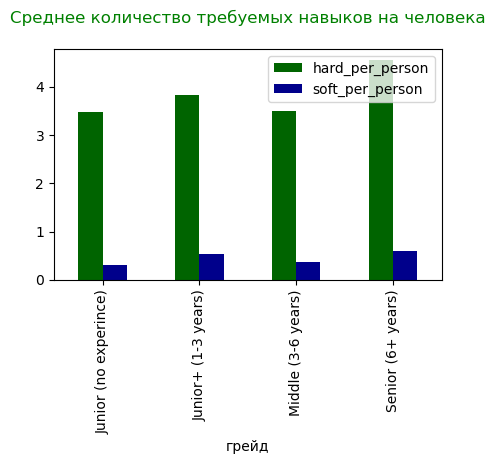

In [215]:
# построим столбчатую диаграмму
colors=['DarkGreen','DarkBlue']
(df_ds_skill_pivot.plot(kind = 'bar', figsize = (5,3), rot = 90, legend = True, fontsize = 10, color=colors)
 .set_title('Среднее количество требуемых навыков на человека' + "\n", fontsize = 12, color='Green')
)  

<u>Вывод:</u>
- чаще указывают hard навыки. Всего в вакансиях DA содержится 6415 требований hardskills, при этом всего 781 softskills. Для DS разница также велика: 3592 hardskills и 430 softskills
- по hardskills количество требований для DS и для DA примерно однинаково, в среднем по 3.6 требования на человека
- по softskills количество требований для DS и для DA также примерно одинаково, в среднем 0.4 требования на человека
- для DA больше всего требований hardskills к соискателям на позицию Senior(в среднем по 5.8 требований на человека), меньше всего - к грейду Junior: по 2.7 требования в среднем. С softskills наоборот: к кандидатам грейда Junior требований немного больше: 0.65 на человека, к Senior - меньше всего: 0.15 на человека. Но следует обрать внимание, что среднее количество требований softskills ко всем - меньше 1 в расчете на человека
- В целом количество трбебований к hardskills для DS отличается не сильно (3-4 требования на человека в зависимости от грейда). Больше всего требований к соискателям на позицию Senior (4.6 на человека в среднем), меньше всего - к Middle (3.5 требования на человека в среднем). Среднее количество требований softskills ко всем - меньше 1 в расчете на человека, также как и для DA. К кандидатам грейда Senior требований немного больше, чем к остальным: 0.6 на человека, к Junior - меньше всего: 0.3 на человека. 

## 8.Определение наиболее желаемых кандидатов <a id="section_8"></a>

### 8.1 Кандидат на вакансию DA <a id="section_8_1"></a>

Необходимо выделить самые важные hard и softskills в разрезе грейдов.

In [216]:
# объединим все hardskills для Junior 
df_da_jun_hard_skills = ','.join(df_da_jun['hard_skills'])

In [217]:
# разделим перечень навыков на отдельные навыки
df_da_jun_hard_skills = df_da_jun_hard_skills.split(',')

In [218]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Junior
counter_jun_hard = Counter(df_da_jun_hard_skills)
counter_jun_hard

Counter({'': 50,
         'sql': 37,
         'python': 34,
         'анализ данных': 31,
         'ms excel': 28,
         'базы данных': 12,
         'работа с базами данных': 11,
         'аналитика': 11,
         'сбор и анализ информации': 8,
         'pandas': 8,
         'аналитические исследования': 8,
         'ms powerpoint': 8,
         'power bi': 7,
         'английский язык': 5,
         'статистический анализ': 5,
         'математическая статистика': 5,
         'ms sql': 4,
         'postgresql': 4,
         'сводные таблицы': 4,
         'бизнес-анализ': 4,
         'субд': 3,
         'excel': 3,
         'пользователь пк': 3,
         'bpmn': 3,
         'анализ ассортиментной линейки': 3,
         '1с': 2,
         'vba': 2,
         'ms office': 2,
         'продвинутый пользователь пк': 2,
         'google docs': 2,
         'работа с документами': 2,
         'знание ms office': 2,
         'dwh': 2,
         'airflow': 2,
         'подготовка презентаций': 2,
 

In [219]:
# объединим все softskills для Junior 
df_da_jun_soft_skills = ','.join(df_da_jun['soft_skills'])

In [220]:
# разделим перечень навыков на отдельные навыки
df_da_jun_soft_skills = df_da_jun_soft_skills.split(',')

In [221]:
# посчитаем входждение каждого навыка в общий перечень softskills для Junior
counter_jun_soft = Counter(df_da_jun_soft_skills)
counter_jun_soft

Counter({'': 93,
         'аналитическое мышление': 33,
         'работа с большим объемом информации': 19,
         'работа в команде': 6,
         'деловая переписка': 3,
         'коммуникация': 3,
         'деловая коммуникация': 3,
         'работа в условиях многозадачности': 2,
         'ответственность и пунктуальность': 2,
         'организаторские навыки': 2,
         'грамотная речь': 2,
         'умение легко находить контакт с людьми': 1,
         'умение работать с большими объемами информации': 1,
         'способность эффективно решать проблемы': 1,
         'умение работать в команде': 1,
         'ответственность': 1,
         'коммуникабельность': 1,
         'внимательность к деталям': 1,
         'грамотная речь и письмо': 1,
         'математический склад ума': 1,
         'навыки переговоров': 1,
         'креативность': 1,
         'готовность обучаться': 1,
         'гибкость мышления': 1,
         'аналитический склад ума': 1,
         'грамотность': 1,
      

In [222]:
# объединим все hardskills для Junior +
df_da_jun_p_hard_skills = ','.join(df_da_jun_p['hard_skills'])

In [223]:
# разделим перечень навыков на отдельные навыки
df_da_jun_p_hard_skills = df_da_jun_p_hard_skills.split(',')

In [224]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Junior +
counter_jun_p_hard = Counter(df_da_jun_p_hard_skills)
counter_jun_p_hard

Counter({'sql': 468,
         '': 338,
         'python': 320,
         'анализ данных': 262,
         'ms excel': 140,
         'power bi': 139,
         'работа с базами данных': 121,
         'аналитика': 115,
         'pandas': 79,
         'ms sql': 75,
         'базы данных': 71,
         'математическая статистика': 66,
         'data analysis': 64,
         'сбор и анализ информации': 64,
         'аналитические исследования': 57,
         'tableau': 53,
         'postgresql': 48,
         'статистический анализ': 42,
         'ms powerpoint': 39,
         'бизнес-анализ': 39,
         'анализ бизнес показателей': 38,
         'документация': 32,
         'etl': 29,
         'big data': 28,
         'hadoop': 26,
         'английский язык': 26,
         'прогнозирование': 26,
         'ms power bi': 26,
         'математический анализ': 24,
         'a/b тесты': 23,
         'clickhouse': 22,
         'vba': 21,
         'power query': 21,
         'сводные таблицы': 21,
      

In [225]:
# объединим все softskills для Junior +
df_da_jun_p_soft_skills = ','.join(df_da_jun_p['soft_skills'])

In [226]:
# разделим перечень навыков на отдельные навыки
df_da_jun_p_soft_skills = df_da_jun_p_soft_skills.split(',')

In [227]:
# посчитаем входждение каждого навыка в общий перечень softskills для Junior +
counter_jun_p_soft = Counter(df_da_jun_p_soft_skills)
counter_jun_p_soft

Counter({'': 782,
         'аналитическое мышление': 182,
         'работа с большим объемом информации': 119,
         'коммуникация': 28,
         'деловая коммуникация': 19,
         'аналитический склад ума': 17,
         'работа в команде': 17,
         'навыки презентации': 8,
         'деловая переписка': 8,
         'аналитические способности': 8,
         'грамотная речь': 8,
         'умение принимать решения': 7,
         'системное мышление': 7,
         'точность и внимательность к деталям': 5,
         'обучение и развитие': 5,
         'многозадачность': 5,
         'работа в условиях многозадачности': 3,
         'умение работать в коллективе': 3,
         'креативность': 3,
         'ответственность': 3,
         'стратегическое мышление': 2,
         'ведение переписки': 2,
         'организаторские навыки': 2,
         'грамотная речь и письмо': 2,
         'внимательность': 2,
         'коммуникабельность': 2,
         'желание зарабатывать': 1,
         'корпоратив

In [228]:
# объединим все hardskills для Middle
df_da_mid_hard_skills = ','.join(df_da_mid['hard_skills'])

In [229]:
# разделим перечень навыков на отдельные навыки
df_da_mid_hard_skills = df_da_mid_hard_skills.split(',')

In [230]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Middle
counter_mid_hard = Counter(df_da_mid_hard_skills)
counter_mid_hard

Counter({'sql': 244,
         'python': 212,
         '': 160,
         'анализ данных': 114,
         'power bi': 71,
         'data analysis': 54,
         'работа с базами данных': 53,
         'аналитика': 48,
         'pandas': 43,
         'базы данных': 43,
         'ms sql': 42,
         'ms excel': 39,
         'математическая статистика': 37,
         'tableau': 36,
         'postgresql': 32,
         'аналитические исследования': 31,
         'a/b тесты': 29,
         'big data': 26,
         'прогнозирование': 24,
         'анализ бизнес показателей': 24,
         'сбор и анализ информации': 24,
         'dwh': 23,
         'статистический анализ': 22,
         'документация': 21,
         'clickhouse': 21,
         'etl': 17,
         'сводные таблицы': 17,
         'ms powerpoint': 15,
         'numpy': 14,
         'machine learning': 14,
         'бизнес-анализ': 13,
         'airflow': 12,
         'bpmn': 12,
         'spark': 12,
         'greenplum': 12,
         'п

In [231]:
# объединим все softskills для Middle
df_da_mid_soft_skills = ','.join(df_da_mid['soft_skills'])

In [232]:
# разделим перечень навыков на отдельные навыки
df_da_mid_soft_skills = df_da_mid_soft_skills.split(',')

In [233]:
# посчитаем входждение каждого навыка в общий перечень softskills для Middle
counter_mid_soft = Counter(df_da_mid_soft_skills)
counter_mid_soft

Counter({'': 434,
         'аналитическое мышление': 67,
         'работа с большим объемом информации': 45,
         'аналитические способности': 10,
         'коммуникация': 7,
         'инициативность и лидерство': 6,
         'способность к саморазвитию': 6,
         'системность мышления': 6,
         'критическое мышление': 6,
         'коммуникативная гибкость': 6,
         'системное мышление': 4,
         'работа в команде': 4,
         'деловая коммуникация': 3,
         'наставничество': 2,
         'организаторские навыки': 2,
         'ответственность': 2,
         'системный подход': 2,
         'обучение и развитие': 2,
         'деловая переписка': 2,
         'многозадачность': 1,
         'навыки презентации': 1,
         'корпоративная этика': 1,
         'стратегическое мышление': 1,
         'расстановка приоритетов': 1,
         'лидерство': 1,
         'руководство коллективом': 1,
         'проактивность': 1,
         'грамотная речь': 1,
         'деловое общен

In [234]:
# объединим все hardskills для Senior
df_da_sen_hard_skills = ','.join(df_da_sen['hard_skills'])

In [235]:
# разделим перечень навыков на отдельные навыки
df_da_sen_hard_skills = df_da_sen_hard_skills.split(',')

In [236]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Senior
counter_sen_hard = Counter(df_da_sen_hard_skills)
counter_sen_hard

Counter({'python': 9,
         'sql': 9,
         'power bi': 4,
         'tableau': 3,
         'аналитические исследования': 3,
         'английский язык': 3,
         'data analysis': 3,
         'a/b тесты': 3,
         'etl': 2,
         'data warehousing': 2,
         'прогнозирование': 2,
         'analysis': 2,
         'статистика': 2,
         'статистический анализ': 2,
         'eda': 2,
         'бизнес-анализ': 2,
         'анализ рынка': 2,
         '': 2,
         'bi': 1,
         'dashboard': 1,
         'tensorflow': 1,
         'анализ данных': 1,
         'математический анализ': 1,
         'ci/cd': 1,
         'machine learning': 1,
         'pytorch': 1,
         'gitlab': 1,
         'scikit-learn': 1,
         'интерпретация данных': 1,
         'визуализация данных': 1,
         'событийная аналитика': 1,
         'исследовательский анализ данных': 1,
         'metabase': 1,
         'big data': 1,
         'системный анализ': 1,
         'основы баз данных':

In [237]:
# объединим все softskills для Senior
df_da_sen_soft_skills = ','.join(df_da_sen['soft_skills'])

In [238]:
# разделим перечень навыков на отдельные навыки
df_da_sen_soft_skills = df_da_sen_soft_skills.split(',')

In [239]:
# посчитаем входждение каждого навыка в общий перечень softskills для Senior
counter_sen_soft = Counter(df_da_sen_soft_skills)
counter_sen_soft

Counter({'': 11, 'проактивность': 1, 'аналитическое мышление': 1})

<u>Вывод:</u>
- Для Junior чаще всего требуются следующие hardskills: sql, python, ms excel, знания в области анализа данных и умение работать с базами данных. Основные softskill: аналитическое мышление, умение работать с большими объемами информации, навыки работы в команде
- Для Junior + чаще всего требуются следующие hardskills: sql, python, знания в области анализа данных, ms excel,  power bi, умение работать с базами данных. Основные softskill: аналитическое мышление, умение работать с большими объемами информации, навыки коммуникации
- Для Middle чаще всего требуются следующие hardskills: sql, python, знания в области анализа данных, power bi, умение работать с базами данных, ms sql, ms excel. Основные softskill: аналитическое мышление, умение работать с большими объемами информации, навыки коммуникации
- Для Senior чаще всего требуются следующие hardskills: sql, power bi, знания в области аналитических исследований,  tableau, a/b тесты, английский язык. Основные softskill: проактивность и аналитическое мышление

### 8.2 Кандидат на вакансию DS <a id="section_8_2"></a>

Необходимо выделить самые важные hard и softskills в разрезе грейдов.

In [240]:
# объединим все hardskills для Junior
df_ds_jun_hard_skills = ','.join(df_ds_jun['hard_skills'])

In [241]:
# разделим перечень навыков на отдельные навыки
df_ds_jun_hard_skills = df_ds_jun_hard_skills.split(',')

In [242]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Junior
counter_jun_hard = Counter(df_ds_jun_hard_skills)
counter_jun_hard

Counter({'sql': 19,
         'python': 15,
         '': 15,
         'анализ данных': 11,
         'power bi': 8,
         'аналитические исследования': 6,
         'базы данных': 5,
         'big data': 5,
         'аналитика': 4,
         'data analysis': 4,
         'математическая статистика': 4,
         'tableau': 4,
         'ms excel': 3,
         'работа с базами данных': 3,
         'spark': 3,
         'pandas': 3,
         'документация': 2,
         'сбор и анализ информации': 2,
         'ms sql': 2,
         'a/b тесты': 2,
         'powerbi': 2,
         'superset': 2,
         'hadoop': 2,
         'postgresql': 2,
         'бизнес-анализ': 2,
         'субд': 1,
         'аналитические навыки': 1,
         'исследования рынка': 1,
         'анализ конкурентной среды': 1,
         'ms power bi': 1,
         'анализ рынка': 1,
         'математический анализ': 1,
         'arcgis qgis git/gitlab python пространственные базы данных agile': 1,
         'продвинутый пользо

In [243]:
# объединим все softskills для Junior
df_ds_jun_soft_skills = ','.join(df_ds_jun['soft_skills'])

In [244]:
# разделим перечень навыков на отдельные навыки
df_ds_jun_soft_skills = df_ds_jun_soft_skills.split(',')

In [245]:
# посчитаем входждение каждого навыка в общий перечень softskills для Junior
counter_jun_soft = Counter(df_ds_jun_soft_skills)
counter_jun_soft

Counter({'': 36,
         'аналитическое мышление': 4,
         'работа с большим объемом информации': 3,
         'аналитический склад ума': 2,
         'желание зарабатывать': 1,
         'проактивность': 1,
         'умение принимать решения': 1,
         'развитые коммуникативные навыки': 1})

In [246]:
# объединим все hardskills для Junior +
df_ds_jun_p_hard_skills = ','.join(df_ds_jun_p['hard_skills'])

In [247]:
# разделим перечень навыков на отдельные навыки
df_ds_jun_p_hard_skills = df_ds_jun_p_hard_skills.split(',')

In [248]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Junior +
counter_jun_p_hard = Counter(df_ds_jun_p_hard_skills)
counter_jun_p_hard

Counter({'sql': 179,
         'python': 139,
         '': 126,
         'анализ данных': 107,
         'ms excel': 60,
         'power bi': 51,
         'работа с базами данных': 45,
         'аналитика': 42,
         'pandas': 40,
         'data analysis': 34,
         'базы данных': 33,
         'ms sql': 32,
         'сбор и анализ информации': 26,
         'postgresql': 25,
         'tableau': 25,
         'математическая статистика': 23,
         'аналитические исследования': 22,
         'прогнозирование': 18,
         'бизнес-анализ': 17,
         'ms powerpoint': 17,
         'статистический анализ': 16,
         'английский язык': 14,
         'анализ бизнес показателей': 14,
         'airflow': 12,
         'etl': 12,
         'dwh': 12,
         'hadoop': 12,
         'a/b тесты': 12,
         'clickhouse': 11,
         'vba': 11,
         'документация': 11,
         'big data': 11,
         'numpy': 10,
         'spark': 10,
         'сводные таблицы': 10,
         'excel'

In [249]:
# объединим все softskills для Junior +
df_ds_jun_p_soft_skills = ','.join(df_ds_jun_p['soft_skills'])

In [250]:
# разделим перечень навыков на отдельные навыки
df_ds_jun_p_soft_skills = df_ds_jun_p_soft_skills.split(',')

In [251]:
# посчитаем входждение каждого навыка в общий перечень softskills для Junior +
counter_jun_p_soft = Counter(df_ds_jun_p_soft_skills)
counter_jun_p_soft

Counter({'': 311,
         'аналитическое мышление': 73,
         'работа с большим объемом информации': 44,
         'коммуникация': 11,
         'работа в команде': 11,
         'деловая коммуникация': 7,
         'деловая переписка': 6,
         'аналитические способности': 5,
         'критическое мышление': 5,
         'навыки составления отчетности': 4,
         'инициативность и лидерство': 4,
         'способность к саморазвитию': 4,
         'системность мышления': 4,
         'коммуникативная гибкость': 4,
         'умение принимать решения': 3,
         'аналитический склад ума': 3,
         'обучение и развитие': 3,
         'грамотная речь': 3,
         'системное мышление': 3,
         'навыки презентации': 3,
         'стратегическое мышление': 2,
         'точность и внимательность к деталям': 2,
         'корпоративная этика': 2,
         'организаторские навыки': 2,
         'работа в условиях многозадачности': 2,
         'многозадачность': 2,
         'деловое общен

In [252]:
# объединим все hardskills для Middle
df_ds_mid_hard_skills = ','.join(df_ds_mid['hard_skills'])

In [253]:
# разделим перечень навыков на отдельные навыки
df_ds_mid_hard_skills = df_ds_mid_hard_skills.split(',')

In [254]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Middle
counter_mid_hard = Counter(df_ds_mid_hard_skills)
counter_mid_hard

Counter({'sql': 194,
         '': 156,
         'python': 144,
         'анализ данных': 108,
         'power bi': 60,
         'ms excel': 58,
         'работа с базами данных': 42,
         'аналитика': 38,
         'ms sql': 37,
         'pandas': 34,
         'data analysis': 31,
         'аналитические исследования': 30,
         'математическая статистика': 26,
         'базы данных': 25,
         'сбор и анализ информации': 24,
         'tableau': 21,
         'postgresql': 20,
         'бизнес-анализ': 20,
         'статистический анализ': 20,
         'ms powerpoint': 17,
         'документация': 16,
         'a/b тесты': 16,
         'анализ бизнес показателей': 15,
         'big data': 14,
         'прогнозирование': 13,
         'ms power bi': 13,
         'dwh': 12,
         'hadoop': 11,
         'etl': 11,
         'power query': 10,
         'clickhouse': 10,
         'сводные таблицы': 10,
         'визуализация данных': 9,
         'подготовка презентаций': 9,
       

In [255]:
# объединим все softskills для Middle
df_ds_mid_soft_skills = ','.join(df_ds_mid['soft_skills'])

In [256]:
# разделим перечень навыков на отдельные навыки
df_ds_mid_soft_skills = df_ds_mid_soft_skills.split(',')

In [257]:
# посчитаем входждение каждого навыка в общий перечень softskills для Middle
counter_mid_soft = Counter(df_ds_mid_soft_skills)
counter_mid_soft

Counter({'': 358,
         'аналитическое мышление': 64,
         'работа с большим объемом информации': 41,
         'коммуникация': 14,
         'деловая коммуникация': 4,
         'аналитический склад ума': 4,
         'системное мышление': 3,
         'работа в команде': 3,
         'работа в условиях многозадачности': 3,
         'организаторские навыки': 3,
         'обучение и развитие': 2,
         'ответственность': 2,
         'грамотная речь и письмо': 2,
         'аналитические способности': 2,
         'навыки составления отчетности': 2,
         'креативность': 2,
         'навыки презентации': 1,
         'умение принимать решения': 1,
         'умение легко находить контакт с людьми': 1,
         'умение работать с большими объемами информации': 1,
         'способность эффективно решать проблемы': 1,
         'ответственность и пунктуальность': 1,
         'умение работать в команде': 1,
         'коммуникабельность': 1,
         'внимательность к деталям': 1,
        

In [258]:
# объединим все hardskills для Senior
df_ds_sen_hard_skills = ','.join(df_ds_sen['hard_skills'])

In [259]:
# разделим перечень навыков на отдельные навыки
df_ds_sen_hard_skills = df_ds_sen_hard_skills.split(',')

In [260]:
# посчитаем входждение каждого навыка в общий перечень hardskills для Senior
counter_sen_hard = Counter(df_ds_sen_hard_skills)
counter_sen_hard

Counter({'sql': 19,
         'python': 18,
         'анализ данных': 7,
         'a/b тесты': 6,
         'ms excel': 5,
         'power bi': 5,
         'работа с базами данных': 5,
         'аналитика': 5,
         '': 4,
         'аналитические исследования': 4,
         'data analysis': 3,
         'ms powerpoint': 3,
         'ms sql': 3,
         'tableau': 2,
         'powerbi': 2,
         'базы данных': 2,
         'математическая статистика': 2,
         'bi': 1,
         'план-фактный анализ бюджета': 1,
         'управленческая отчетность': 1,
         'финансовая отчетность': 1,
         'финансовое планирование': 1,
         'анализ текущих финансовых показателей': 1,
         'финансовый менеджмент': 1,
         'финансовый анализ': 1,
         'аналитика продаж': 1,
         'аналитика данных': 1,
         'maplnfo professional': 1,
         'ms access': 1,
         'google sheets': 1,
         'сводные таблицы': 1,
         'ms visio': 1,
         'факторный анализ': 1

In [261]:
# объединим все softskills для Senior
df_ds_sen_soft_skills = ','.join(df_ds_sen['soft_skills'])

In [262]:
# разделим перечень навыков на отдельные навыки
df_ds_sen_soft_skills = df_ds_sen_soft_skills.split(',')

In [263]:
# посчитаем входждение каждого навыка в общий перечень softskills для Senior
counter_sen_soft = Counter(df_ds_sen_soft_skills)
counter_sen_soft

Counter({'': 22,
         'работа с большим объемом информации': 8,
         'аналитическое мышление': 3,
         'многозадачность': 2,
         'точность и внимательность к деталям': 1,
         'аналитический склад ума': 1,
         'навыки презентации': 1,
         'работа в команде': 1,
         'системное мышление': 1,
         'системность': 1})

<u>Вывод:</u>
- Для Junior чаще всего требуются следующие hardskills: sql, python, знания в области анализа данных, power BI. Основные softskills: аналитическое мышление, умение работать с большими объемами информации, коммуникативные навыки
- Для Junior + чаще всего требуются следующие hardskills: sql, python, знания в области анализа данных, ms excel,  power bi. Основные softskills: аналитическое мышление, умение работать с большими объемами информации, навыки коммуникации и работы в команде
- Для Middle чаще всего требуются следующие hardskills: sql, python, знания в области анализа данных, power bi, ms excel, умение работать с БД. Основные softskills: аналитическое мышление, умение работать с большими объемами информации, навыки коммуникации
- Для Senior чаще всего требуются следующие hardskills: sql, python, знания в области аналитических исследований, a/b тесты, ms excel, power bi. Основные softskills: умение работать с большими объемами информации, аналитическое мышление, многозадачность

## 9. Расчет помесячной динамики количества вакансий <a id="section_9"></a>

### 9.1 Динамика количества вакансий DA <a id="section_9_1"></a>

Проверим, сколько вакансий DA размещалось на сайте каждый месяц

In [264]:
#создадим новый датафрейм с информацией об изменении количества вакансий DA по месяцам
df_da_month = df_da.groupby(by='month')['id'].count()
df_da_month

month
2      1
3    284
4    488
5    623
6    385
Name: id, dtype: int64

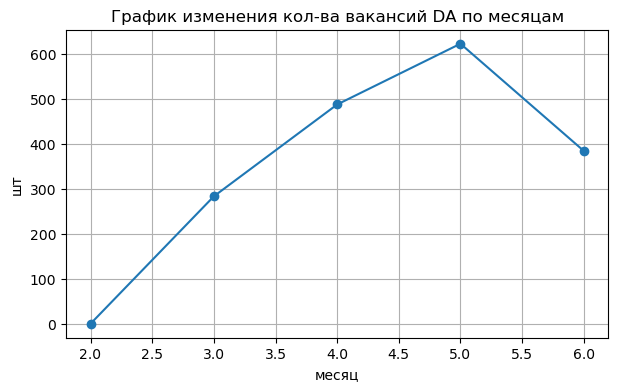

In [265]:
# построим график
df_da_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DA по месяцам')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

Проверим, сколько вакансий DA размещалось на сайте каждый месяц в разрезе грейдов

In [266]:
#создадим новый датафрейм с информацией об изменении количества вакансий DA по месяцам для грейда Junior
df_da_jun_month = df_da_jun.groupby(by='month')['id'].count()
df_da_jun_month

month
3    21
4    36
5    50
6    34
Name: id, dtype: int64

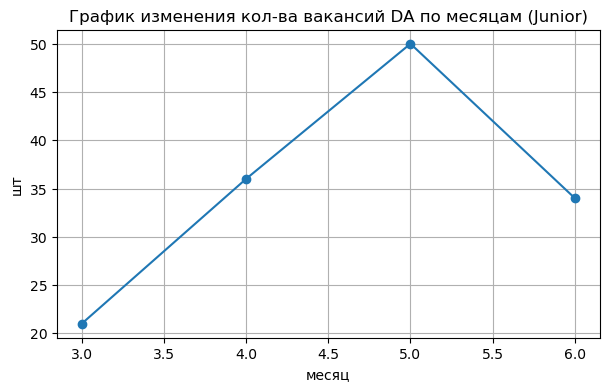

In [267]:
# построим график
df_da_jun_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DA по месяцам (Junior)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [268]:
#создадим новый датафрейм с информацией об изменении количества вакансий DA по месяцам для грейда Junior +
df_da_jun_p_month = df_da_jun_p.groupby(by='month')['id'].count()
df_da_jun_p_month

month
3    168
4    310
5    370
6    239
Name: id, dtype: int64

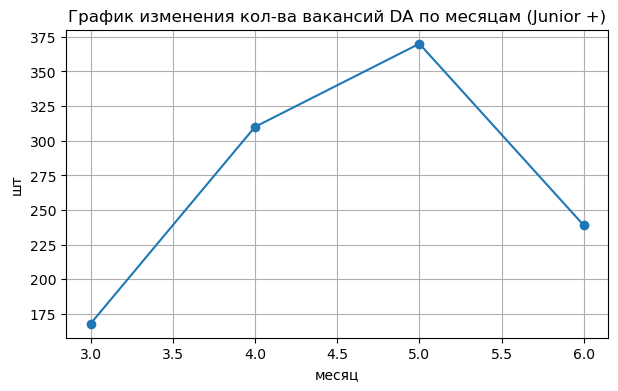

In [269]:
# построим график
df_da_jun_p_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DA по месяцам (Junior +)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [270]:
#создадим новый датафрейм с информацией об изменении количества вакансий DA по месяцам для грейда Middle
df_da_mid_month = df_da_mid.groupby(by='month')['id'].count()
df_da_mid_month

month
2      1
3     95
4    138
5    197
6    109
Name: id, dtype: int64

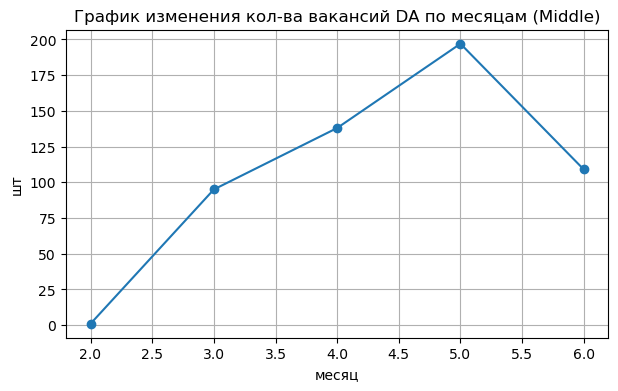

In [271]:
# построим график
df_da_mid_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DA по месяцам (Middle)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [272]:
#создадим новый датафрейм с информацией об изменении количества вакансий DA по месяцам для грейда Senior
df_da_sen_month = df_da_sen.groupby(by='month')['id'].count()
df_da_sen_month

month
4    4
5    6
6    3
Name: id, dtype: int64

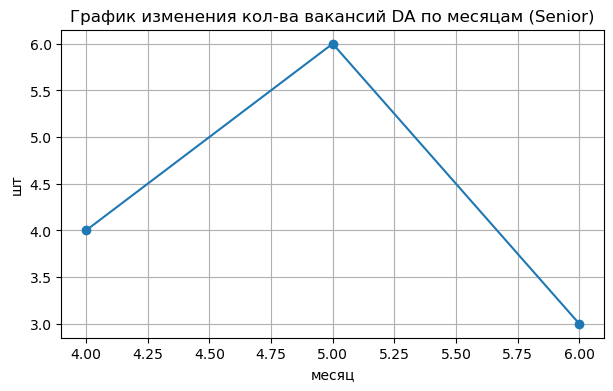

In [273]:
# построим график
df_da_sen_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DA по месяцам (Senior)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

<u>Вывод:</u> 
- количество вакансий DA росло с февраля по май, в мае достигло пика, в июне упало ниже апрельских показателей, но осталось выше мартовских
- динамика количества вакансий в разрезе грейдов в целом повторяет поведение графика изменения общего числа вакансий, но сотрудники уровня Junior и Junior + вообще не было требовались в феврале, а Senior в феврале и марте
- показатели по июню гораздо меньше майских в том числе потому, что от июня в расчеты попало всего 11 дней. Принимая во внимание эту информацию, можно сделать вывод, что количество вакансий DA имеет тенденцию к росту по всем грейдам.

### 9.2 Динамика количества вакансий DS <a id="section_9_2"></a>

Проверим, сколько вакансий DS размещалось на сайте каждый месяц

In [274]:
#создадим новый датафрейм с информацией об изменении количества вакансий DS по месяцам
df_ds_month = df_ds.groupby(by='month')['id'].count()
df_ds_month

month
2      1
3    227
4    295
5    230
6    221
Name: id, dtype: int64

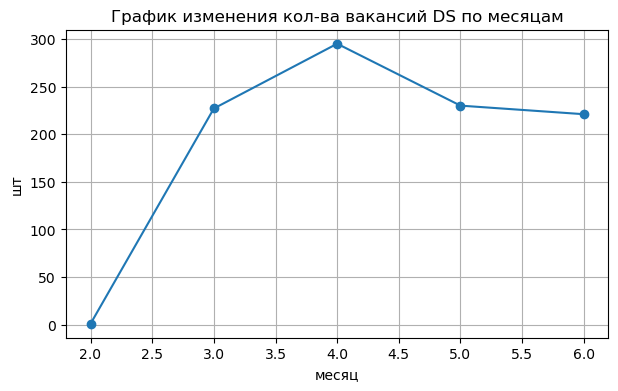

In [275]:
# построим график
df_ds_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DS по месяцам')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

Проверим, сколько вакансий DS размещалось на сайте каждый месяц в разрезе грейдов

In [276]:
#создадим новый датафрейм с информацией об изменении количества вакансий DS по месяцам для грейда Junior
df_ds_jun_month = df_ds_jun.groupby(by='month')['id'].count()
df_ds_jun_month

month
3    13
4    10
5    14
6     7
Name: id, dtype: int64

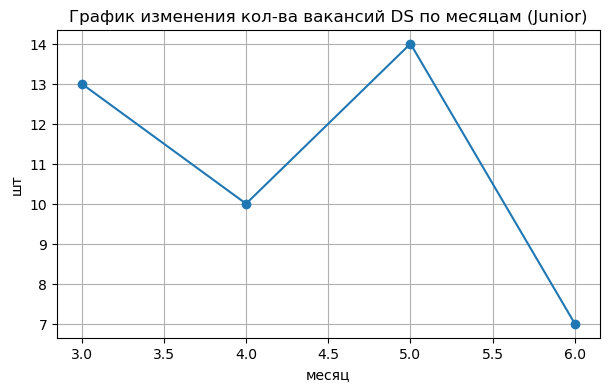

In [277]:
# построим график
df_ds_jun_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DS по месяцам (Junior)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [278]:
#создадим новый датафрейм с информацией об изменении количества вакансий DS по месяцам для грейда Junior +
df_ds_jun_p_month = df_ds_jun_p.groupby(by='month')['id'].count()
df_ds_jun_p_month

month
3    103
4    137
5     94
6     99
Name: id, dtype: int64

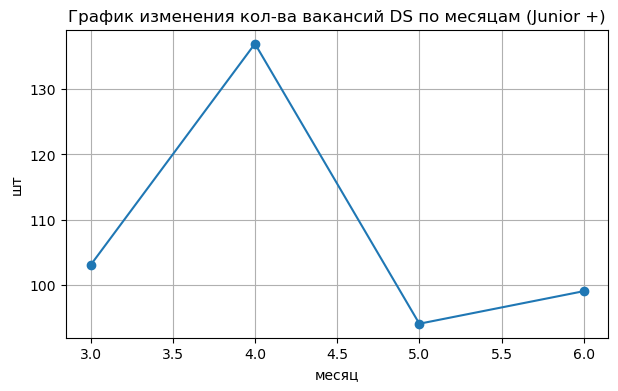

In [279]:
# построим график
df_ds_jun_p_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DS по месяцам (Junior +)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [280]:
#создадим новый датафрейм с информацией об изменении количества вакансий DS по месяцам для грейда Middle
df_ds_mid_month = df_ds_mid.groupby(by='month')['id'].count()
df_ds_mid_month

month
3    105
4    136
5    116
6    108
Name: id, dtype: int64

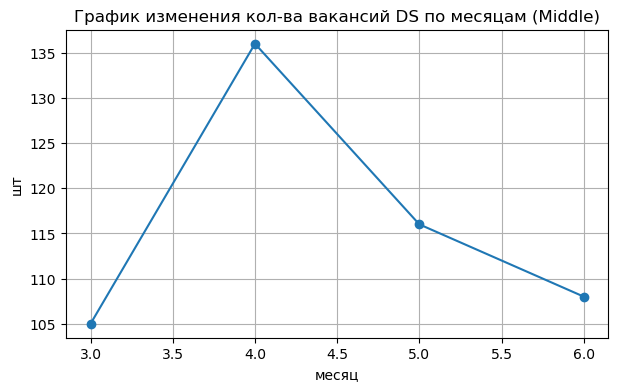

In [281]:
# построим график
df_ds_mid_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DS по месяцам (Middle)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

In [282]:
#создадим новый датафрейм с информацией об изменении количества вакансий DS по месяцам для грейда Senior
df_ds_sen_month = df_ds_sen.groupby(by='month')['id'].count()
df_ds_sen_month

month
2     1
3     6
4    12
5     6
6     7
Name: id, dtype: int64

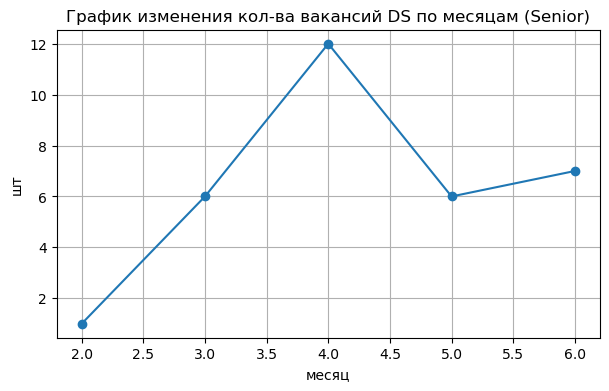

In [283]:
# построим график
df_ds_sen_month.plot(marker='o', figsize=(7,4), grid=True)
plt.title('График изменения кол-ва вакансий DS по месяцам (Senior)')
plt.xlabel('месяц')
plt.ylabel('шт')
plt.show()

<u>Вывод:</u>
- общее количество вакансий DS меняется не критично, каждый месяц размещают от 200 до 300 вакансий. Февраль - исключение, т.к. в анализируемый период попал лишь один день февраля. В июне проанализировано всего 11 дней. На основании этого можно предположить, что количество вакансий, размещенных в июне к концу месяца может значительно увеличиться. Но даже с учетом того, что не обработаны все дни, количество вакансий в июне находится в том за промежутке от 200 до 300 шт, как и в остальные месяцы
- в феврале была лишь 1 вакансия Senior
- количество вакансий грейда Junior в апреле было меньше, чем в марте, а затем снова выросло, в июне их количество снова упало. Но, данные за июнь неполные, поэтому есть вероятность того, что количество вакансий вырастет к концу месяца
- больше всего вакансий грейда Junior + было размещено в апреле, потом их количество упало, но в целом оно остается на уровне марта, около 100 вакансий в месяц
- для грейда Junior также размещается около 100 вакансий в месяц, в апреле наблюдается пик - 136 вакансий
- вакансий Senior немного, пик их количества также наблюдается в апреле. В июне, даже с учетом того, что месяц участвует в выборке не полностью, количество вакансий находится выше уровня марта и мая, следовательно можно предположить, что спрос на DS Senior снова растет

## 10. Анализ вакансий в разрезе регионов <a id="section_10"></a>

Дополнительно определим уровень зарплат, требуемый график работы и тип занятости в различных регионах. <br>
Проанализируем:
- из каких городов размещено больше всего вакансий, определим топ-5
- велико ли отличие средних московских зарплат и зарплат в других городах из топ-5 по количеству вакансий
- популярна ли удаленная работа в других городах из топ-5, кроме Москвы 
- есть ли вакансии с частичной занятостью, стажировкой и проектной работой в каких-либо других городах из топ-5, кроме Москвы.

### 10.1 Вакансии DA <a id="section_10_1"></a>

In [284]:
# сформируем топ-5 городов с наибольшим количеством вакансий
da_top = df_da.groupby('area')['id'].count().sort_values(ascending=False).head(5)
da_top

area
Москва             1230
Санкт-Петербург     180
Екатеринбург         51
Нижний Новгород      33
Новосибирск          33
Name: id, dtype: int64

In [285]:
# сформируем датафрейм, в который будут входить лишь записи по городам из топ-5
df_da_top = df_da[df_da['area'].isin(da_top.index)]

Посмотрим на показатели медианных величин средней зарплаты для пяти регионов с наибольшим количеством вакансий

In [286]:
# сгруппируем данные по городу, выведем медианные величины средних зарплат
df_da_top_salary = df_da_top.groupby('area')['salary_mean'].median().sort_values(ascending=False)
df_da_top_salary

area
Москва             120000.0
Санкт-Петербург    120000.0
Нижний Новгород    100000.0
Екатеринбург        80000.0
Новосибирск         73675.0
Name: salary_mean, dtype: float64

Text(0.5, 1.0, 'Средняя зарплата DA по городам из топ-5\n')

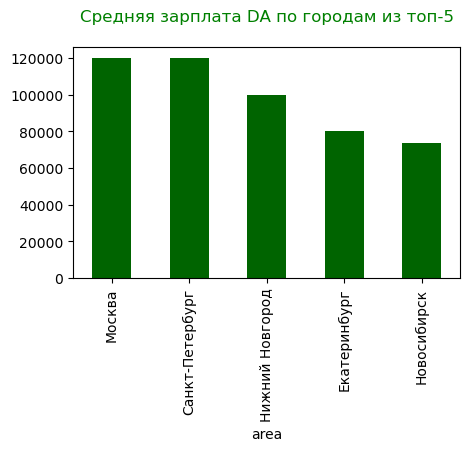

In [287]:
# построим диаграмму
colors=['DarkGreen']
(df_da_top_salary.plot(kind = 'bar', figsize = (5,3), rot = 90, legend = False, fontsize = 10, color=colors)
 .set_title('Средняя зарплата DA по городам из топ-5' + "\n", fontsize = 12, color='Green')
)  

Определим типичный график работы для топ-5 регионов

In [288]:
# сформируем сводную таблицу данных, сгруппированных по городу с подсчетом количества вакансий по типу графика работы
df_da_top_p = df_da_top.pivot_table(index=['area'], values=['id'], columns=['schedule'], aggfunc='count')
df_da_top_p

id                                            
schedule        Гибкий график Полный день Сменный график Удаленная работа
area                                                                     
Екатеринбург              NaN        42.0            NaN              9.0
Москва                   33.0       980.0            5.0            212.0
Нижний Новгород           1.0        25.0            1.0              6.0
Новосибирск               2.0        22.0            NaN              9.0
Санкт-Петербург           NaN       145.0            2.0             33.0

<Axes: xlabel='None-schedule', ylabel='area'>

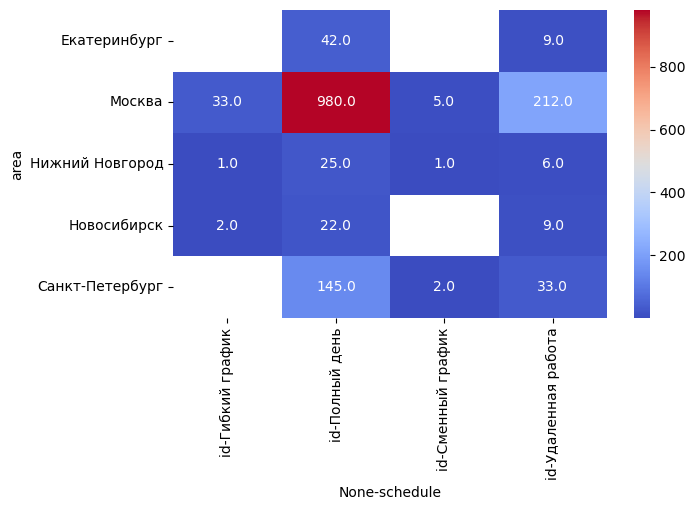

In [289]:
# построим тепловую карту
plt.figure(figsize = (7,4))
sns.heatmap(df_da_top_p, cmap='coolwarm', fmt='', annot=True) 

Определим основной тип занятости для топ-5 регионов

In [290]:
# сформируем сводную таблицу данных, сгруппированных по городу с подсчетом количества вакансий по типу занятости
df_da_top_em = df_da_top.pivot_table(index=['area'], values=['id'], columns=['employment'], aggfunc='count')
df_da_top_em

id                              \
employment      Полная занятость Проектная работа Стажировка   
area                                                           
Екатеринбург                51.0              NaN        NaN   
Москва                    1209.0              4.0       10.0   
Нижний Новгород             33.0              NaN        NaN   
Новосибирск                 33.0              NaN        NaN   
Санкт-Петербург            173.0              1.0        2.0   

                                     
employment      Частичная занятость  
area                                 
Екатеринбург                    NaN  
Москва                          7.0  
Нижний Новгород                 NaN  
Новосибирск                     NaN  
Санкт-Петербург                 4.0

<Axes: xlabel='None-employment', ylabel='area'>

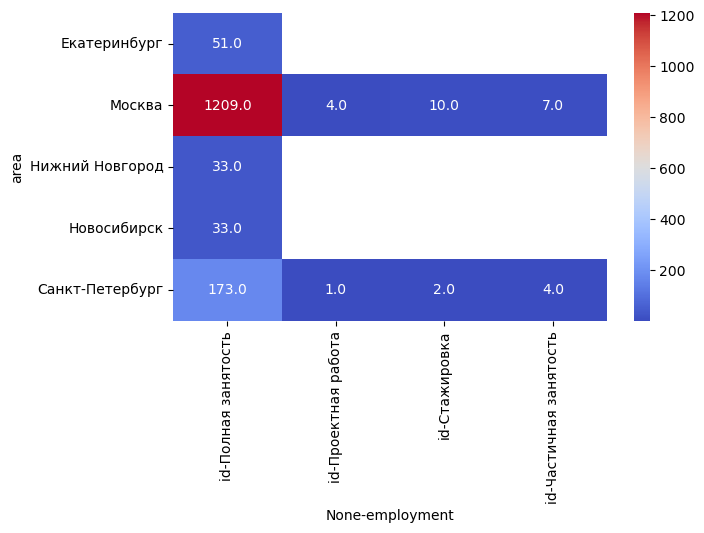

In [291]:
# построим тепловую карту
plt.figure(figsize = (7,4))
sns.heatmap(df_da_top_em, cmap='coolwarm', fmt='', annot=True) 

<u>Вывод:</u> 
- В топ-5 по количеству вакансий DS входят: Москва, Санкт-Петербург, Екатеринбург, Нижний Новгород и Новосибирск. 
- Количество вакансий в Москве отличается значительно: 1230 против 180 в СПб, который находится на втором месте. В остальных городах пятерки 51-33 вакансии. 
- Уровень средних зарплат для DA без деления на грейды в Москве и СПб не отличается: 120 тыс.руб. В остальных городах уровень зарплат предсказуемо ниже. Однако, из-за большого количества вакансий в Москве, можно наблюдать большое их разнообразие, что и влияет на формирование среднего. 
- Во всех регионах предпочитают график работы "полный день" и полную занятость. В Екатеринбурге нет информации о вакансиях с гибким и сменным графиком, в Спб с гибким, в Новосибирске - со сменным. Типы занятости кроме полной не популярны в других городах кроме Москвы и СПб

### 10.2 Вакансии DS <a id="section_10_2"></a>

In [292]:
# сформируем топ-5 городов с наибольшим количеством вакансий
ds_top = df_ds.groupby('area')['id'].count().sort_values(ascending=False).head(5)
ds_top

area
Москва             762
Санкт-Петербург     91
Новосибирск         25
Екатеринбург        19
Нижний Новгород     17
Name: id, dtype: int64

In [293]:
# сформируем датафрейм, в который будут входить лишь записи по городам из топ-5
df_ds_top = df_ds[df_ds['area'].isin(ds_top.index)]

Посмотрим на показатели медианных величин средней зарплаты для пяти регионов с наибольшим количеством вакансий

In [294]:
# сгруппируем данные по городу, выведем медианные величины средних зарплат
df_ds_top_salary = df_ds_top.groupby('area')['salary_mean'].median().sort_values(ascending=False)
df_ds_top_salary

area
Москва             250000.0
Новосибирск        192500.0
Санкт-Петербург    170000.0
Екатеринбург       105000.0
Нижний Новгород    100000.0
Name: salary_mean, dtype: float64

Text(0.5, 1.0, 'Средняя зарплата DS по городам из топ-5\n')

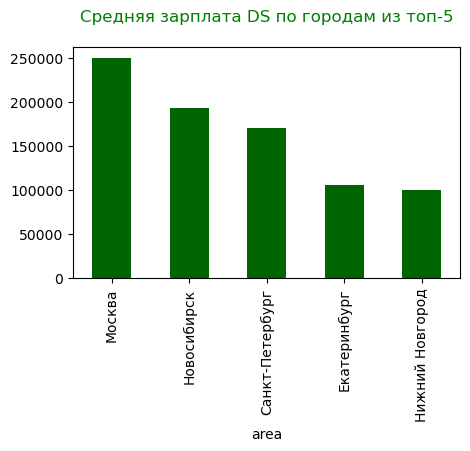

In [295]:
# построим диаграмму
colors=['DarkGreen']
(df_ds_top_salary.plot(kind = 'bar', figsize = (5,3), rot = 90, legend = False, fontsize = 10, color=colors)
 .set_title('Средняя зарплата DS по городам из топ-5' + "\n", fontsize = 12, color='Green')
)  

Определим типичный график работы для топ-5 регионов

In [296]:
# сформируем сводную таблицу данных, сгруппированных по городу с подсчетом количества вакансий по типу графика работы
df_ds_top_p = df_ds_top.pivot_table(index=['area'], values=['id'], columns=['schedule'], aggfunc='count')
df_ds_top_p

id                                            
schedule        Гибкий график Полный день Сменный график Удаленная работа
area                                                                     
Екатеринбург              1.0        14.0            NaN              4.0
Москва                   33.0       578.0            5.0            146.0
Нижний Новгород           2.0         8.0            NaN              7.0
Новосибирск               1.0        14.0            NaN             10.0
Санкт-Петербург           2.0        71.0            NaN             18.0

<Axes: xlabel='None-schedule', ylabel='area'>

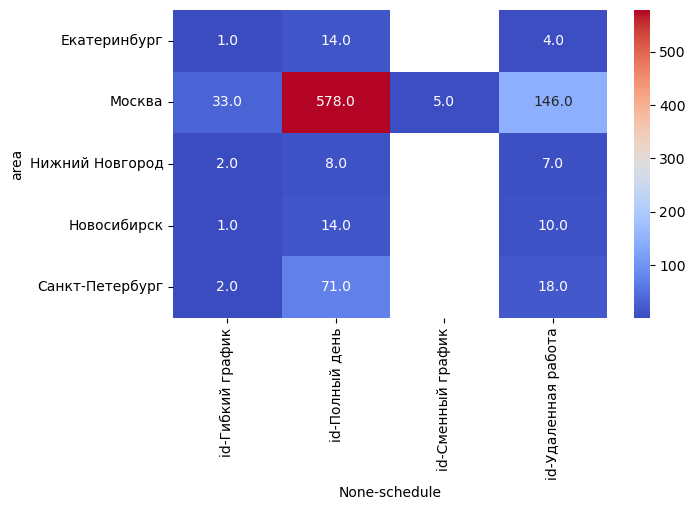

In [297]:
# построим тепловую карту
plt.figure(figsize = (7,4))
sns.heatmap(df_ds_top_p, cmap='coolwarm', fmt='', annot=True) 

Определим основной тип занятости для топ-5 регионов

In [298]:
# сформируем сводную таблицу данных, сгруппированных по городу с подсчетом количества вакансий по типу занятости
df_ds_top_em = df_ds_top.pivot_table(index=['area'], values=['id'], columns=['employment'], aggfunc='count')
df_ds_top_em

id                              \
employment      Полная занятость Проектная работа Стажировка   
area                                                           
Екатеринбург                18.0              NaN        NaN   
Москва                     743.0              3.0       12.0   
Нижний Новгород             17.0              NaN        NaN   
Новосибирск                 21.0              NaN        3.0   
Санкт-Петербург             84.0              2.0        4.0   

                                     
employment      Частичная занятость  
area                                 
Екатеринбург                    1.0  
Москва                          4.0  
Нижний Новгород                 NaN  
Новосибирск                     1.0  
Санкт-Петербург                 1.0

<Axes: xlabel='None-employment', ylabel='area'>

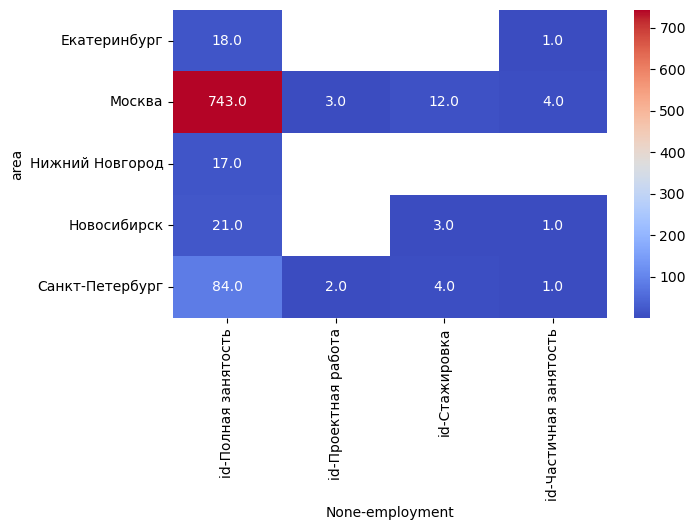

In [299]:
# построим тепловую карту
plt.figure(figsize = (7,4))
sns.heatmap(df_ds_top_em, cmap='coolwarm', fmt='', annot=True) 

<u>Вывод:</u> 
- в топ-5 по количеству вакансий DA входят: Москва, Санкт-Петербург, Новосибирск, Екатеринбург и Нижний Новгород. 
- Количество вакансий в Москве отличается значительно: 762 против 91 в СПб, который находится на втором месте. В остальных городах пятерки 25-17 вакансий. 
- Уровень средних зарплат, без деления на греды, в Москве предсказуемо выше всего: 250 тыс.руб. На втором месте Новосибирск - 192500 тыс.руб. В СПб чуть ниже - 170 тыс.руб. В Екатеринбурге и Нижнем Новогороде около 100 тыс.руб. 
- Во всех регионах предпочитают график работы "полный день" и полную занятость. Сменного графика нет ни в каких городах кроме Москвы. Проектную работу предлагают только в Москве и СПб. В Нижнем Новгороде также нет стажировок и частичной занятости. В Екатеринбурге нет стажировок. 

## 11. Выводы и рекомендации <a id="section_11"></a>

<u>Выводы:</u>
- Исследуемый период для DS на 16 дней меньше, чем для DA. Для DA - с 13 февраля 2024 г по 11 июня 2024 г, для DS - с 29 февраля 2024 г по 11 июня 2024 г;
- И для DS, и для DA требуются специалисты 4-х грейдов: Junior, Junior+, Middle и Senior
- Среди аналитиков самая большая потребность в специалистах уровня Junior+. Среди Data Scientist наибольшим спросом пользуются специалисты уровня Middle и Junior +. Для обеих специальностей меньше всего вакансий грейда Senior
- Cреди вакансий DA 61% составлет грейд Junior+, почти треть (30.3%) приходится на вакансии Middle. Грейд Junior составляет значительно меньшую часть (7.9 %). Доля вакансий Senior очень мала - меньше одного процента (0.7%). У вакансий DS разброс по количеству вакансий Middle и Junior + совсем небольшой (47.7% и 44.5% соответственно). Количество вакансий грейда Junior и Senior не отличается настолько значительно, как у DA (4.5% и 3.3% соответственно).
- Зарплаты DA имеют нижнюю границу от 25000 руб. до 240000 руб и верхнюю границу от 25000 руб до 350000 руб. Зарплаты DS имеют нижнюю границу от 25000 руб до 350000 руб и верхнюю границу от 25000 руб до 550000 руб.
- Типичное место работы для грейда Junior: СБЕР, полная занятость, полный день. Эти условия являются типичными и для DA, и для DS. Есть разброс по з/п. DA в среднем получает около 68 тыс. руб. Для DS средние зарплаты чаще всего около 60 тыс. руб., но диапазон нижней и верхней границ з/п при этом от 60 до 80 тыс. руб, тоесть имеется достаточное количество вакансий, где верхний диапазон зарплат выше, чем у DA.
- Типичное место работы для грейда Junior +: СБЕР, полная занятость, полный день. Эти условия являются типичными и для DA, и для DS. Есть разброс по з/п. Для DA характерна з/п от 86 тыс. руб. до 120 тыс. руб (медианные значения), при этом большинство вакансий на зарплату около 100 тыс.руб. Для DS характерна з/п от 120 тыс. руб. до 250 тыс. руб (медианные значения), при этом значительное количество вакансий на зарплату около 350 тыс.руб. Величина средней зарплаты около 200 тыс. руб. Зарплаты DS Junior+ в среднем значительно выше.
- Типичное место работы для грейда Middle: СБЕР, полная занятость, полный день. Эти условия являются типичными и для DA, и для DS. Есть разброс по з/п. Для DA характерна з/п от 150 тыс. руб. до 200 тыс. руб(ориентируясь на медианные значения), средняя зарплата около 165 тыс. руб. При этом имеется значительное количество вакансий со средней зарплатой около 250 тыс. руб. Для DS характерна з/п от 200 тыс. руб. до 300 тыс. руб. Средняя зарплата чаще всего укладывается в диапазон от 200 до 250 тыс. руб. Тоесть зарплаты DS в среднем выше, но есть отдельные вакансии DA, у которых уровень зарплат может конкурировать с DS
- Типичное место работы для грейда Senior: Леруа Мерлен (для DA) или Fundraise Up (для DS), полная занятость, полный день. Есть разброс по з/п. Для DA характерна з/п от 200 тыс. руб. до 280 тыс. руб. Средняя з/п около 200 тыс. руб. Для DS характерна з/п от 160 тыс. руб. до 300 тыс. руб.(медианные значения), при этом есть вакансия на 550 тыс.руб. Тоесть средние значение верхних и нижних границ зарплат примерно одинаковы для обоих специальностей, но для DS есть вакансии на гораздо более высокооплачиваемую работу, чем для DA (максимум 550 тыс. руб для DS, тогда как для DA только 280 тыс. руб)
- В датасетах в целом мало вакансий Senior и для большинства из них не указаны верхние и нижние границы зарплаты. Можно сделать вывод, что компании неохотно указывают уровень зарплат на самый высокий грейд. Из-за небольшого количества данных по зарплатам Senior возникают такие ситуации как та, что для DA максимальная предлагаемая зарпалата для данного грейда 280 тыс. руб., что меньше чем для Middle в других компаниях.
- СБЕР предоставляет преимущественное количество вакансий для DA в целом, в тройку входят маркетплейсы WILDBERRIES и Ozon (для DA), а для DS - Ozon и Газпромбанк. Большинство работодателей предпочитает сотрудников с полной занятостью и полным рабочим днем. Это актуально для обеих специальностей
- При формировании требовании в вакансиях чаще указывают hard навыки. Всего в вакансиях DA содержится 6415 требований hardskills, при этом всего 781 softskills. Для DS разница также велика: 3592 hardskills и 430 softskills.
- При расчете среднего количества требований на человека, у DA и DS показатели приблизительно одинаковы и равны по 3.6 требования hardskills и по 0.4 требования softskills
- Для DA больше всего требований hardskills к соискателям на позицию Senior(в среднем по 5.8 требований на человека), меньше всего - к грейду Junior: по 2.7 требования в среднем. Для DS больше всего требований к соискателям на позицию Senior (4.6 на человека в среднем), меньше всего - к Middle (3.5 требования на человека в среднем).
- Среднее количество требований softskills ко всем - меньше 1 в расчете на человека. Для DA к кандидатам грейда Junior требований немного больше: 0.65 на человека, к Senior - меньше всего: 0.15 на человека. Для DS к кандидатам грейда Senior требований немного больше, чем к остальным: 0.6 на человека, к Junior - меньше всего: 0.3 на человека.
- Для всех грейдов DA требуются следующие hardskills: sql, python, знания в области анализа данных. Для грейдов Junior-Middle требуется знание MS Excel, а также умение работать с базами данных. Для Junior+-Senior требуется знание Power BI. Также для Senior важно знание Tableau, A/B тестов и приветсвуется владение английским языком.
- Для DS значительное количество вакансий Junior кроме тех же требований к hardskills, что к DA, содержат требования на знание Power BI. В основном, наиболее популярные навыки по грейдам для DA и DS совпадают. Для Senior DS менее популярен Tableau, но более популярен MS Excel
- Среди softskills для всех грейдов DA популярно требование к аналитическому мышлению соискателя. Также важна способность работать с большими объемами информации и навки коммуникации или работы в команде. Для Senior актуальна проактивность.
- Для DS также важно аналитичесоке мышление и умение работать с большими объемами информации. Для грейдов Junior-Middle особенно важны коммуникативные навыки, а для Senior - многозадачность.
- Количество вакансий DA росло с февраля по май, в мае достигло пика, в июне упало ниже апрельских показателей, но осталось выше мартовских. Показатели по июню гораздо меньше майских в том числе потому, что от июня в расчеты попало всего 11 дней. Принимая во внимание эту информацию, можно сделать вывод, что количество вакансий DA имеет тенденцию к росту по всем грейдам. Динамика количества вакансий в разрезе грейдов в целом повторяет поведение графика изменения общего числа вакансий. Сотрудники уровня Junior и Junior + вообще не было требовались в феврале, а Senior в феврале и марте
- Общее количество вакансий DS меняется не критично, каждый месяц размещают от 200 до 300 вакансий. Февраль - исключение, т.к. в анализируемый период попал лишь один день февраля, за который была размещена лишь вакансия грейда Senior. Также в июне проанализировано всего 11 дней. На основании этого можно предположить, что количество вакансий, размещенных в июне к концу месяца может значительно увеличиться. По всем грейдам, кроме Junior пик по количеству размещенных вакансий был в апреле. В целом, для DS не наблюдается такого стабильного роста, как для DA, однако для DS количество вакансий вообще изменяется незначительно, что тоже является признаком стабильности. Более-менее резкие скачки есть для грейда Senior, но для него в целом вакансий немного. Апрельский пик - всего 12 вакансий Senior, относительно 6-ти в ближайшие месяцы (в два раза больше, но само количество невысоко).
- в топ-5 городов по количеству вакансий входят Москва, Санкт-Петербург, Екатеринбург, Нижний Новгород и Новосибирск. Для DS Новосибирск на 3-м месте, а Екатеринбург и Нижний Новогород на 4-м и 5-м соответственно.
- Количество вакансий в Москве по обеим специальностям в отличается значительно: 1230 против 180 в СПб, который находится на втором месте (для DA), 762 против 91 в СПб (для DS). В остальных городах вакансий еще меньше. Уровень средних зарплат по DA без деления на грейды в Москве и СПб одинаковый - 120 тыс. руб. В остальных городах уровень зарплат предсказуемо ниже. Для DS в Москве самая высокая средняя зарплата 250 тыс. руб. Во всех регионах предпочитают график работы "полный день" и полную занятость. Для DA другие типы занятости кроме полной имеют место только в Москве и СПб. Для DS ни в одном регионе, кроме Москвы нет сменного графика.
<br>
<br>
<u>Рекомендации (для соискателя):</u> 
- при отстутствии большого опыта работы рекомендую обратить внимание на вакансии DA, на эту специальность гораздо больше вакансий в целом и Junior + в частности
- у DS выше уровень зарплат, требования по основным hardskills и softskills примерно одинаковые для DA и DS, можно начать карьерный путь в DA и в дальнейшем развиваться до DS
- следует обратить внимание на изучение sql, python, power bi и MS Excel. Знание Tableau, A\B тестов и английского языка будет твоим преимуществом
- для успешной работы потребуется аналитическое мышление и навыки работы в команде. Нужно быть готовым много общаться, искать информацию, анализировать и делать выводы
- следует обратить внимение на СБЕР и маркетплейсы - они размещают большое количество вакансий
- большая часть вакансий размещается московскими компаниями, но надо иметь ввиду, что многие из них готовы предоставить удаленную работу, поэтому рекомендую искать вакансии не только в регионе проживания


## Презентация <a id="section_presentation"></a>

https://disk.yandex.ru/i/fPpti7QHf5QcKg